<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1001-1050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2443]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2444]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

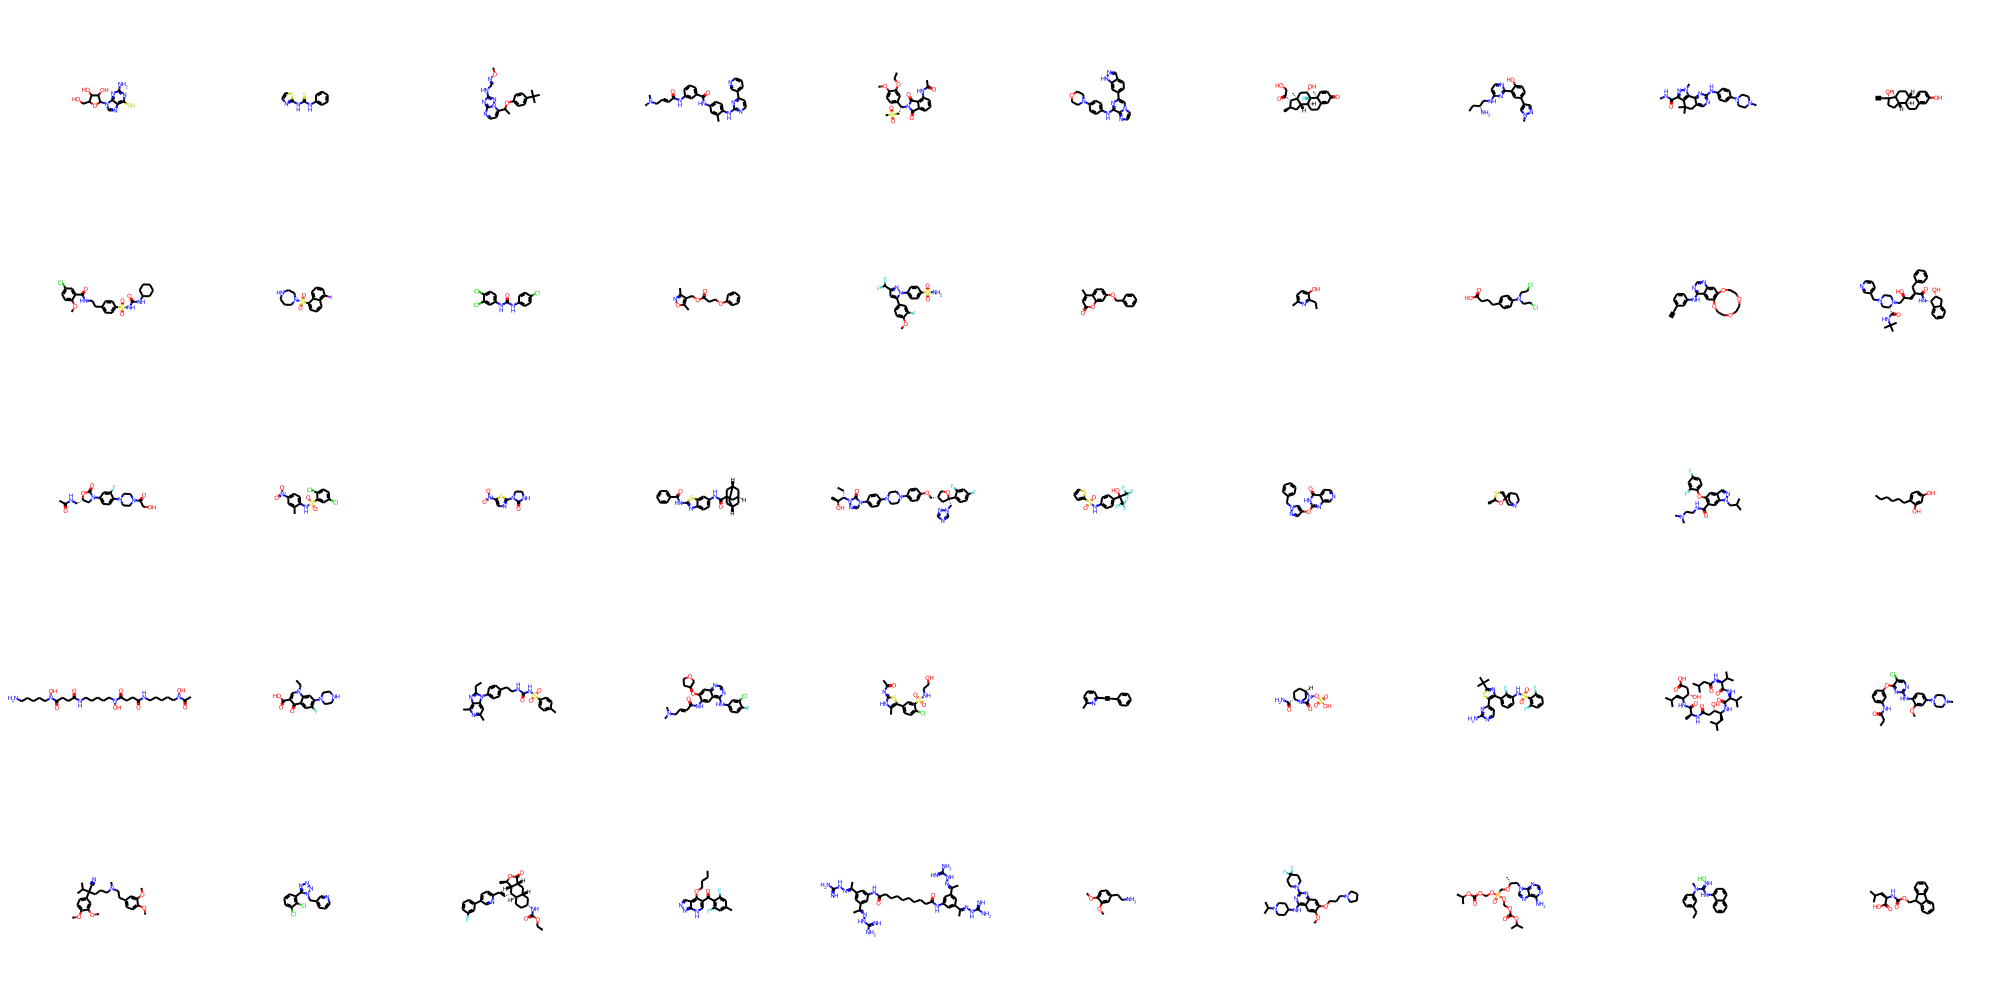

In [2445]:
smiles_list = [

'Nc1nc(S)c2ncn(C3OC(CO)C(O)C3O)c2n1',
'S=C(Nc1ccccc1)Nc1nccs1',
'CO/N=C/Nc1nc2nccc(C(C)Oc3ccc(C(C)(C)C)cc3)n2n1',
'Cc1cc(NC(=O)c2cccc(NC(=O)/C=C/CN(C)C)c2)ccc1Nc1nccc(-c2cccnc2)n1',
'CCOc1cc([C@@H](CS(C)(=O)=O)N2C(=O)c3cccc(NC(C)=O)c3C2=O)ccc1OC',
'c1cn2cc(-c3ccc4cn[nH]c4c3)nc(Nc3ccc(N4CCOCC4)cc3)c2n1',
'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@H]1C(=O)CO',
'CC[C@@H](N)CNc1ccnc(-c2cc(-c3cnn(C)c3)ccc2O)n1',
'CNC(=O)c1nn(C)c2c1C(C)(C)Cc1cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc1-2',
'C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(O)ccc4[C@H]3CC[C@@]21C',
'COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1',
'O=S(=O)(c1cccc2c(I)cccc12)N1CCCNCC1',
'O=C(Nc1ccc(Cl)cc1)Nc1ccc(Cl)c(Cl)c1',
'Cc1noc(C)c1COC(=O)CCOc1ccccc1',
'COc1ccc(-c2cc(C(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1F',
'Cc1cc(=O)oc2cc(OCc3ccccc3)ccc12',
'CCc1nc(C)ccc1O',
'O=C(O)CCCc1ccc(N(CCCl)CCCl)cc1',
'C#Cc1cccc(Nc2ncnc3cc4c(cc23)OCCOCCOCCO4)c1',
'CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O',
'CC(=O)NC[C@H]1CN(c2ccc(N3CCN(C(=O)CO)CC3)c(F)c2)C(=O)O1',
'Cc1cc([N+](=O)[O-])ccc1NS(=O)(=O)c1cc(Cl)ccc1Cl',
'O=C1NCCN1c1ncc([N+](=O)[O-])s1',
'O=C(Nc1nc2ccc(NC(=O)C34C[C@H]5C[C@@H](C3)C[C@@H](C4)C5)cc2s1)c1ccccc1',
'CC[C@@H]([C@H](C)O)n1ncn(-c2ccc(N3CCN(c4ccc(OC[C@@H]5CO[C@@](Cn6cncn6)(c6ccc(F)cc6F)C5)cc4)CC3)cc2)c1=O',
'O=S(=O)(Nc1ccc(C(O)(C(F)(F)F)C(F)(F)F)cc1)c1cccs1',
'O=c1[nH]c(Oc2cnn(Cc3ccccc3)c2)nc2cnccc12',
'C[C@@H]1O[C@@]2(CS1)CN1CCC2CC1',
'CC(C)Cn1ncc2cc(Oc3ccc(F)cc3F)c(C(=O)NCCN(C)C)cc21',
'CCCCCCc1ccc(O)cc1O',
'CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCN',
'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21',
'CCc1nc2c(C)nc(C)cc2n1-c1ccc(CCNC(=O)NS(=O)(=O)c2ccc(C)cc2)cc1',
'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1',
'CC(=O)/N=c1/[nH]c(C)c(-c2ccc(Cl)c(S(=O)(=O)NCCO)c2)s1',
'Cc1cccc(C#Cc2ccccc2)n1',
'NC(=O)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)O',
'CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2F)c(-c2ccnc(N)n2)s1',
'CC(C)CC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)[C@@H](O)CC(=O)N[C@@H](C)C(=O)N[C@@H](CC(C)C)[C@@H](O)CC(=O)O)C(C)C)C(C)C',
'CCC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1',
'COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C)cc1OC',
'Clc1cccc(-c2nnnn2Cc2cccnc2)c1Cl',
'CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@H]1C(=O)O[C@H](C)[C@H]1[C@H]2/C=C/c1ccc(-c2cccc(F)c2)cn1',
'CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)c[nH]c2nncc1-2',
'CC(=NNC(=N)N)c1cc(NC(=O)CCCCCCCCC(=O)Nc2cc(C(C)=NNC(=N)N)cc(C(C)=NNC(=N)N)c2)cc(C(C)=NNC(=N)N)c1',
'COc1ccc(CCN)cc1OC',
'COc1cc2c(NC3CCN(C(C)C)CC3)nc(N3CCC(F)(F)CC3)nc2cc1OCCCN1CCCC1',
'CC(C)OC(=O)OCOP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc21)OCOC(=O)OC(C)C',
'CCc1cccc(N(C)C(=N)Nc2cccc3ccccc23)c1.Cl',
'CC(C)C[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



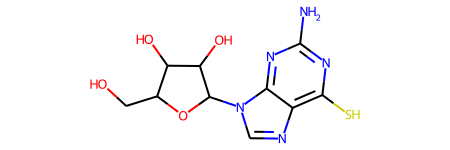

In [2446]:
M1 = mol_list [0]
M1

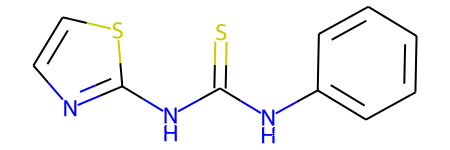

In [2447]:
M2 = mol_list [1]
M2

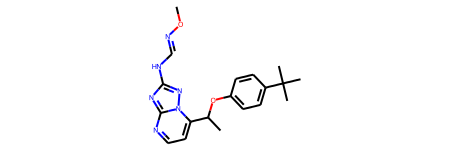

In [2448]:
M3 = mol_list [2]
M3

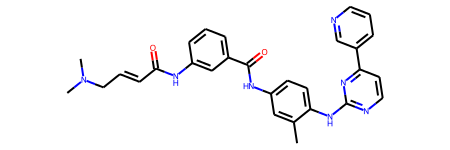

In [2449]:
M4 = mol_list [3]
M4

In [2450]:
M5 = mol_list [4]
M5

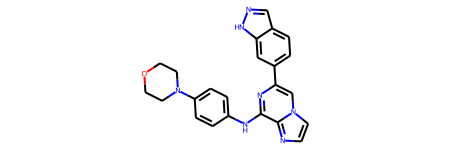

In [2451]:
M6 = mol_list [5]
M6

In [2452]:
M7 = mol_list [6]
M7

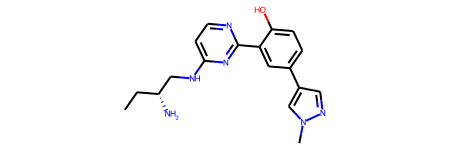

In [2453]:
M8 = mol_list [7]
M8

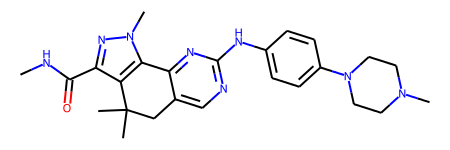

In [2454]:
M9 = mol_list [8]
M9

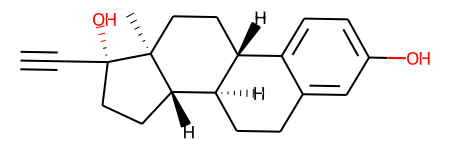

In [2455]:
M10 = mol_list [9]
M10

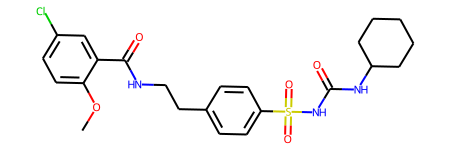

In [2456]:
M11 = mol_list [10]
M11

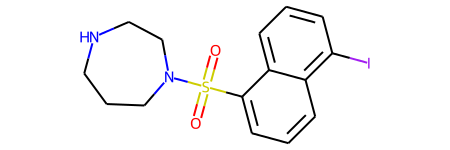

In [2457]:
M12 = mol_list [11]
M12

In [2458]:
M13 = mol_list [12]
M13

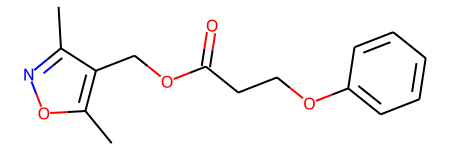

In [2459]:
M14 = mol_list [13]
M14

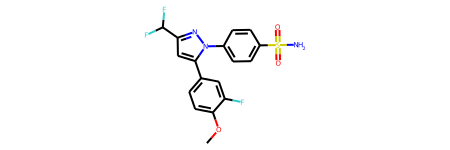

In [2460]:
M15 = mol_list [14]
M15

In [2461]:
M16 = mol_list [15]
M16

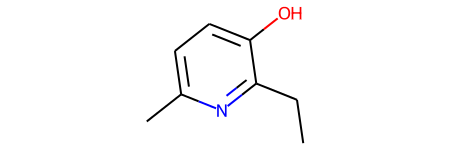

In [2462]:
M17 = mol_list [16]
M17

In [2463]:
M18 = mol_list [17]
M18

In [2464]:
M19 = mol_list [18]
M19

In [2465]:
M20 = mol_list [19]
M20

In [2466]:
M21 = mol_list [20]
M21

In [2467]:
M22 = mol_list [21]
M22

In [2468]:
M23 = mol_list [22]
M23

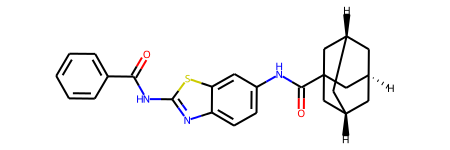

In [2469]:
M24 = mol_list [23]
M24

In [2470]:
M25 = mol_list [24]
M25

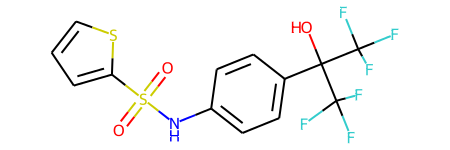

In [2471]:
M26 = mol_list [25]
M26

In [2472]:
M27 = mol_list [26]
M27

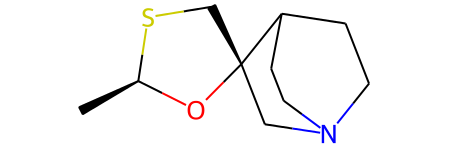

In [2473]:
M28 = mol_list [27]
M28

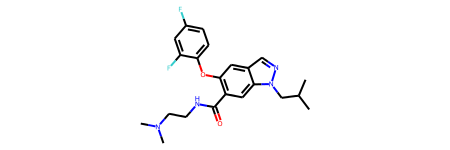

In [2474]:
M29 = mol_list [28]
M29

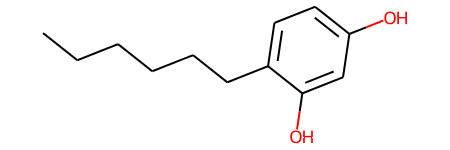

In [2475]:
M30 = mol_list [29]
M30

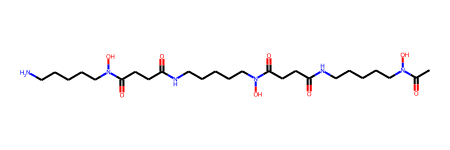

In [2476]:
M31 = mol_list [30]
M31

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


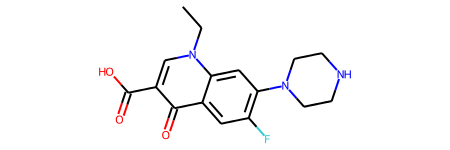

In [2477]:
M32 = mol_list [31]
M32

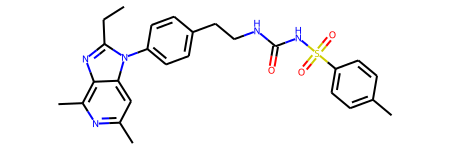

In [2478]:
M33 = mol_list [32]
M33

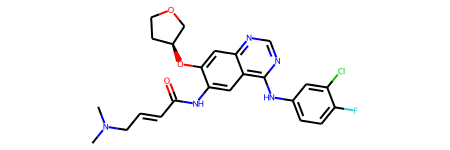

In [2479]:
M34 = mol_list [33]
M34

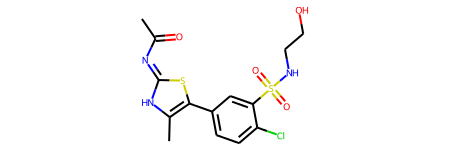

In [2480]:
M35 = mol_list [34]
M35

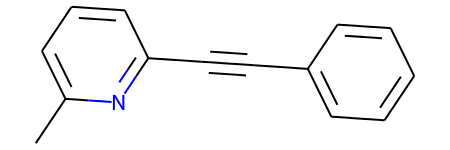

In [2481]:
M36 = mol_list [35]
M36

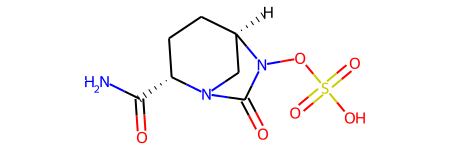

In [2482]:
M37= mol_list [36]
M37

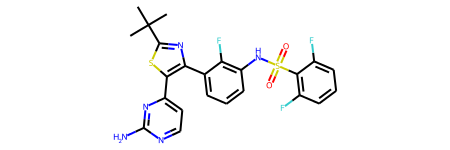

In [2483]:
M38= mol_list [37]
M38

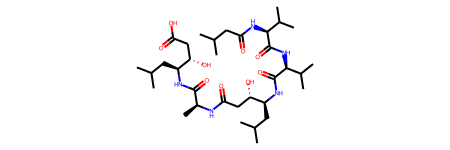

In [2484]:
M39= mol_list [38]
M39

In [2485]:
M40= mol_list [39]
M40

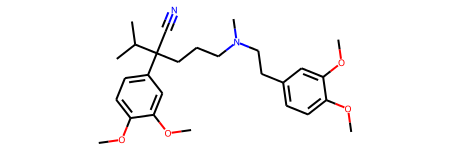

In [2486]:
M41= mol_list [40]
M41

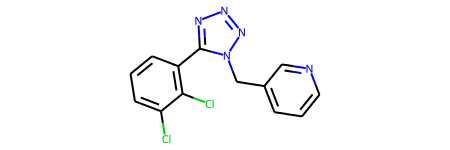

In [2487]:
M42= mol_list [41]
M42

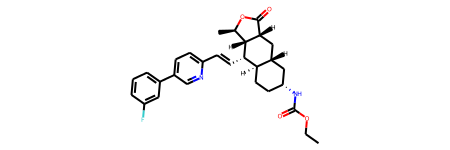

In [2488]:
M43= mol_list [42]
M43

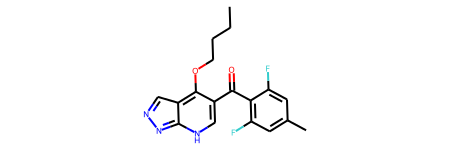

In [2489]:
M44= mol_list [43]
M44

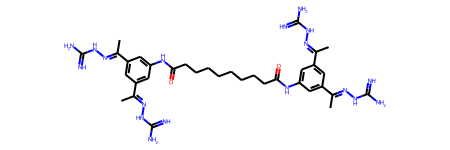

In [2490]:
M45= mol_list [44]
M45

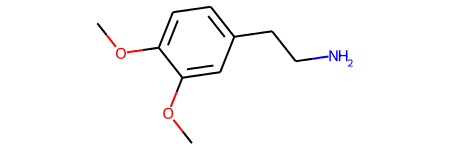

In [2491]:
M46= mol_list [45]
M46

In [2492]:
M47= mol_list [46]
M47

In [2493]:
M48= mol_list [47]
M48

In [2494]:
M49= mol_list [48]
M49

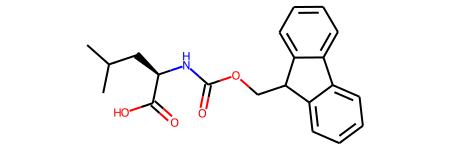

In [2495]:
M50= mol_list [49]
M50

In [2496]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[29,
 71,
 75,
 80,
 128,
 147,
 152,
 194,
 210,
 216,
 222,
 229,
 233,
 289,
 356,
 378,
 409,
 428,
 433,
 454,
 463,
 492,
 514,
 519,
 577,
 610,
 656,
 672,
 700,
 740,
 783,
 807,
 820,
 831,
 849,
 897,
 932,
 935,
 956,
 1019]

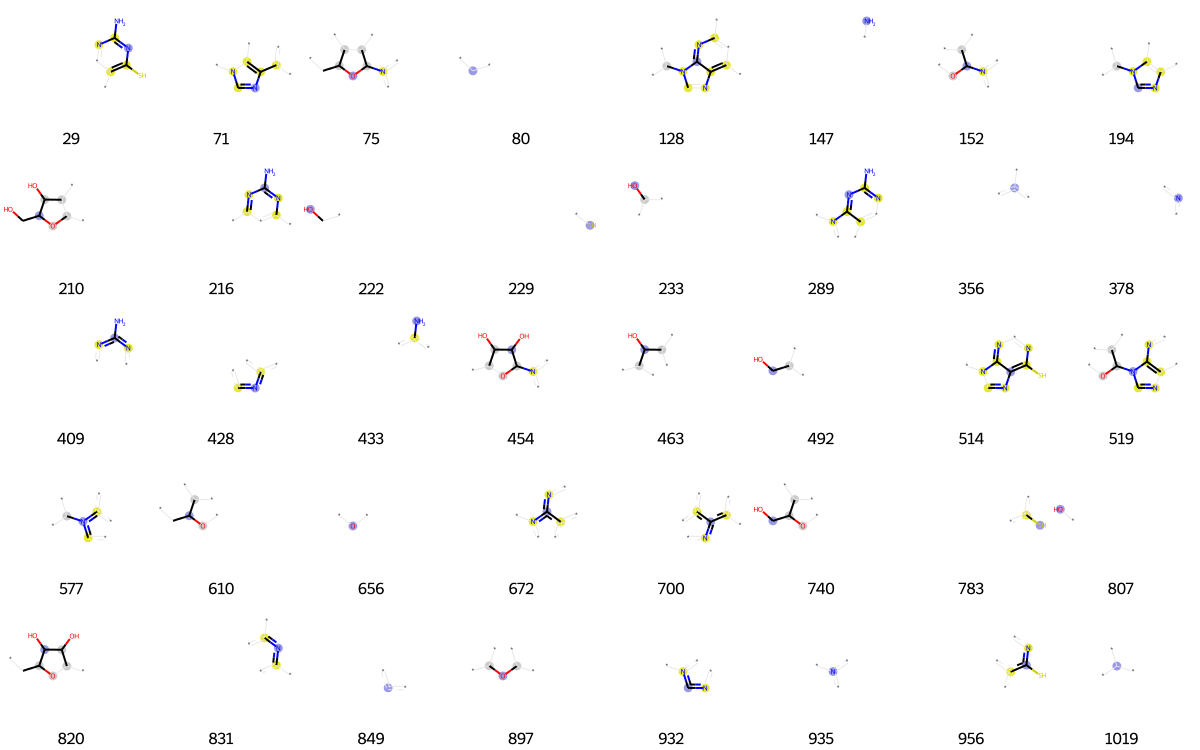

In [2497]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2498]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[14,
 53,
 64,
 97,
 110,
 128,
 175,
 191,
 307,
 356,
 378,
 385,
 389,
 412,
 428,
 501,
 543,
 554,
 595,
 675,
 703,
 726,
 738,
 792,
 807,
 842,
 849,
 905,
 936,
 986]

In [2499]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2500]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 4,
 13,
 33,
 69,
 99,
 114,
 125,
 128,
 149,
 283,
 284,
 315,
 322,
 356,
 360,
 378,
 389,
 392,
 393,
 398,
 408,
 412,
 414,
 428,
 447,
 532,
 558,
 611,
 641,
 664,
 694,
 695,
 703,
 713,
 718,
 725,
 726,
 787,
 813,
 831,
 841,
 842,
 849,
 851,
 885,
 932,
 935,
 968,
 972,
 989]

In [2501]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[15,
 19,
 31,
 33,
 61,
 64,
 80,
 128,
 136,
 139,
 157,
 184,
 191,
 200,
 257,
 305,
 332,
 356,
 361,
 367,
 378,
 399,
 418,
 420,
 428,
 437,
 458,
 485,
 486,
 491,
 511,
 518,
 526,
 555,
 558,
 562,
 579,
 650,
 652,
 694,
 698,
 703,
 726,
 736,
 771,
 787,
 792,
 795,
 807,
 831,
 832,
 840,
 842,
 843,
 849,
 875,
 876,
 881,
 893,
 894,
 954,
 961,
 972,
 980,
 1012,
 1015]

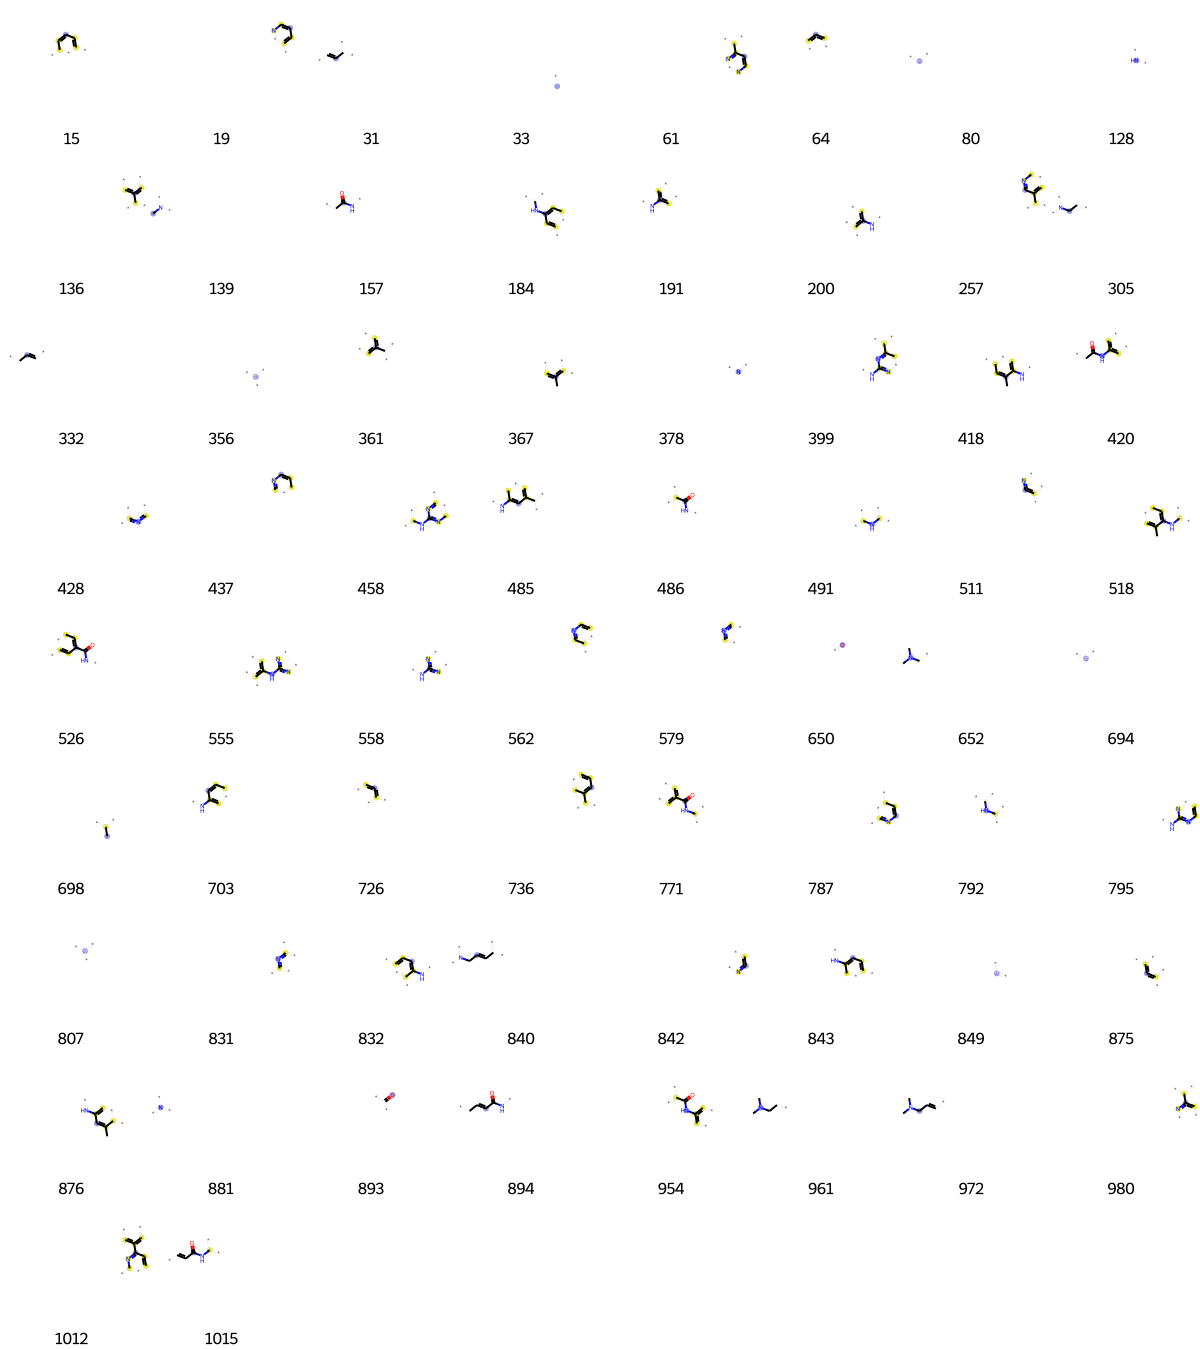

In [2502]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2503]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 15,
 33,
 44,
 46,
 64,
 80,
 94,
 128,
 140,
 181,
 200,
 214,
 237,
 245,
 249,
 294,
 314,
 341,
 350,
 352,
 356,
 420,
 425,
 428,
 433,
 452,
 497,
 512,
 520,
 525,
 553,
 570,
 642,
 650,
 672,
 683,
 692,
 695,
 723,
 726,
 747,
 792,
 807,
 819,
 829,
 841,
 849,
 875,
 879,
 893,
 929,
 935,
 946,
 979,
 984,
 1013,
 1017]

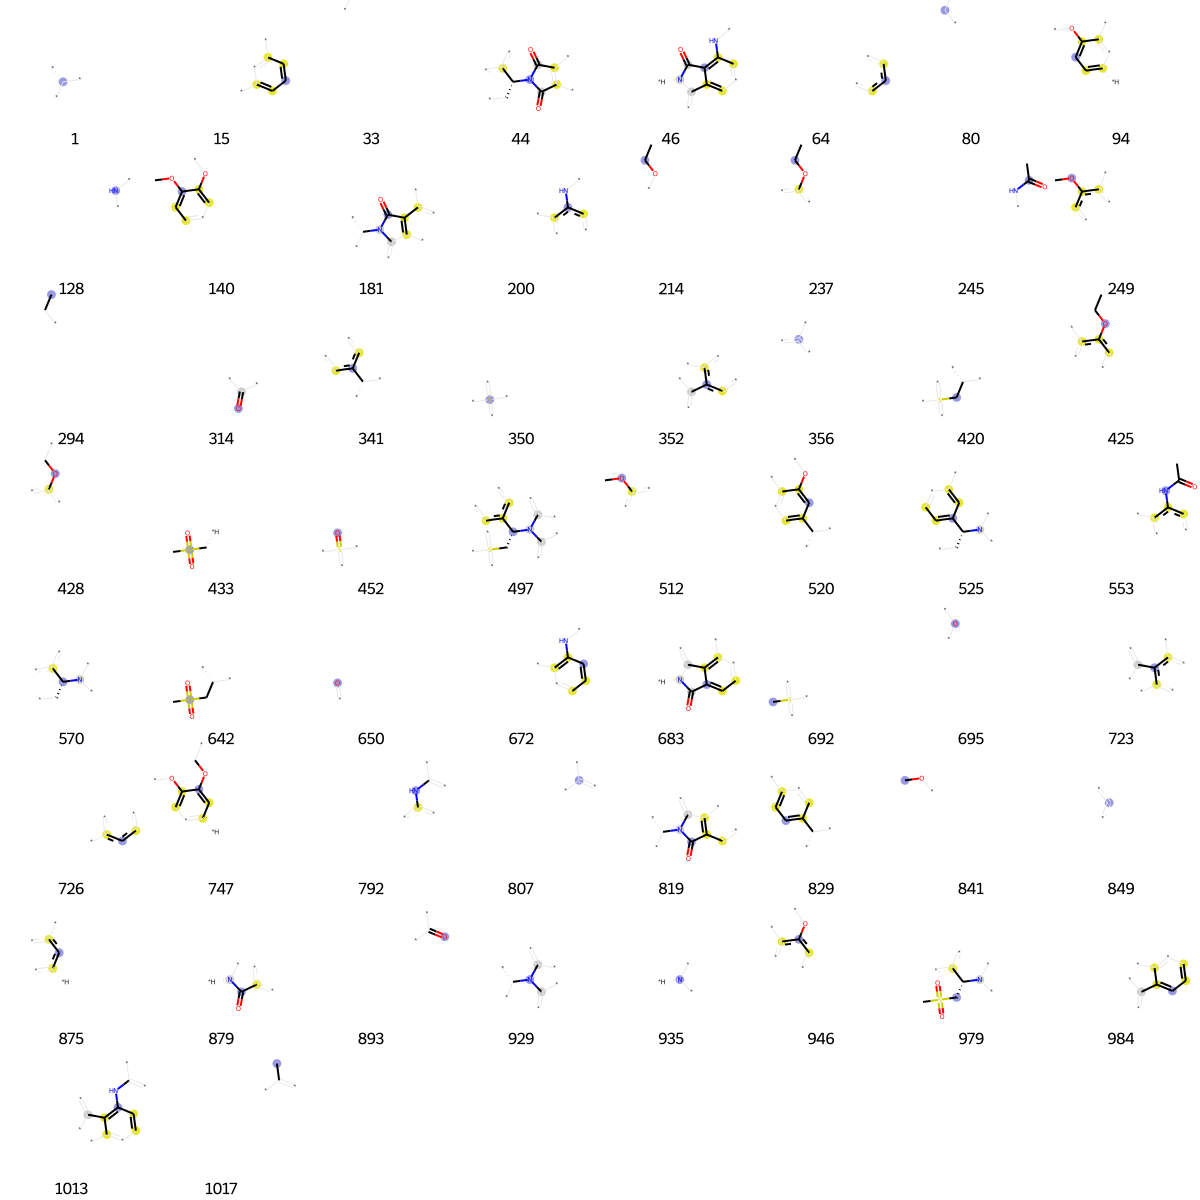

In [2504]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2505]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[74,
 77,
 90,
 95,
 96,
 119,
 128,
 136,
 191,
 203,
 233,
 248,
 280,
 291,
 356,
 378,
 381,
 387,
 407,
 417,
 420,
 428,
 456,
 464,
 491,
 500,
 505,
 511,
 522,
 523,
 564,
 571,
 599,
 600,
 609,
 623,
 656,
 672,
 687,
 708,
 726,
 730,
 801,
 806,
 831,
 842,
 843,
 849,
 875,
 888,
 896,
 926,
 935,
 950,
 971,
 980,
 1014]

In [2506]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[18,
 33,
 36,
 37,
 61,
 80,
 84,
 92,
 144,
 170,
 182,
 222,
 233,
 250,
 251,
 268,
 270,
 285,
 301,
 314,
 356,
 376,
 404,
 453,
 460,
 494,
 504,
 519,
 547,
 600,
 640,
 650,
 664,
 679,
 710,
 714,
 740,
 748,
 750,
 760,
 767,
 787,
 804,
 807,
 835,
 849,
 893,
 904,
 926,
 967,
 997,
 1005,
 1019]

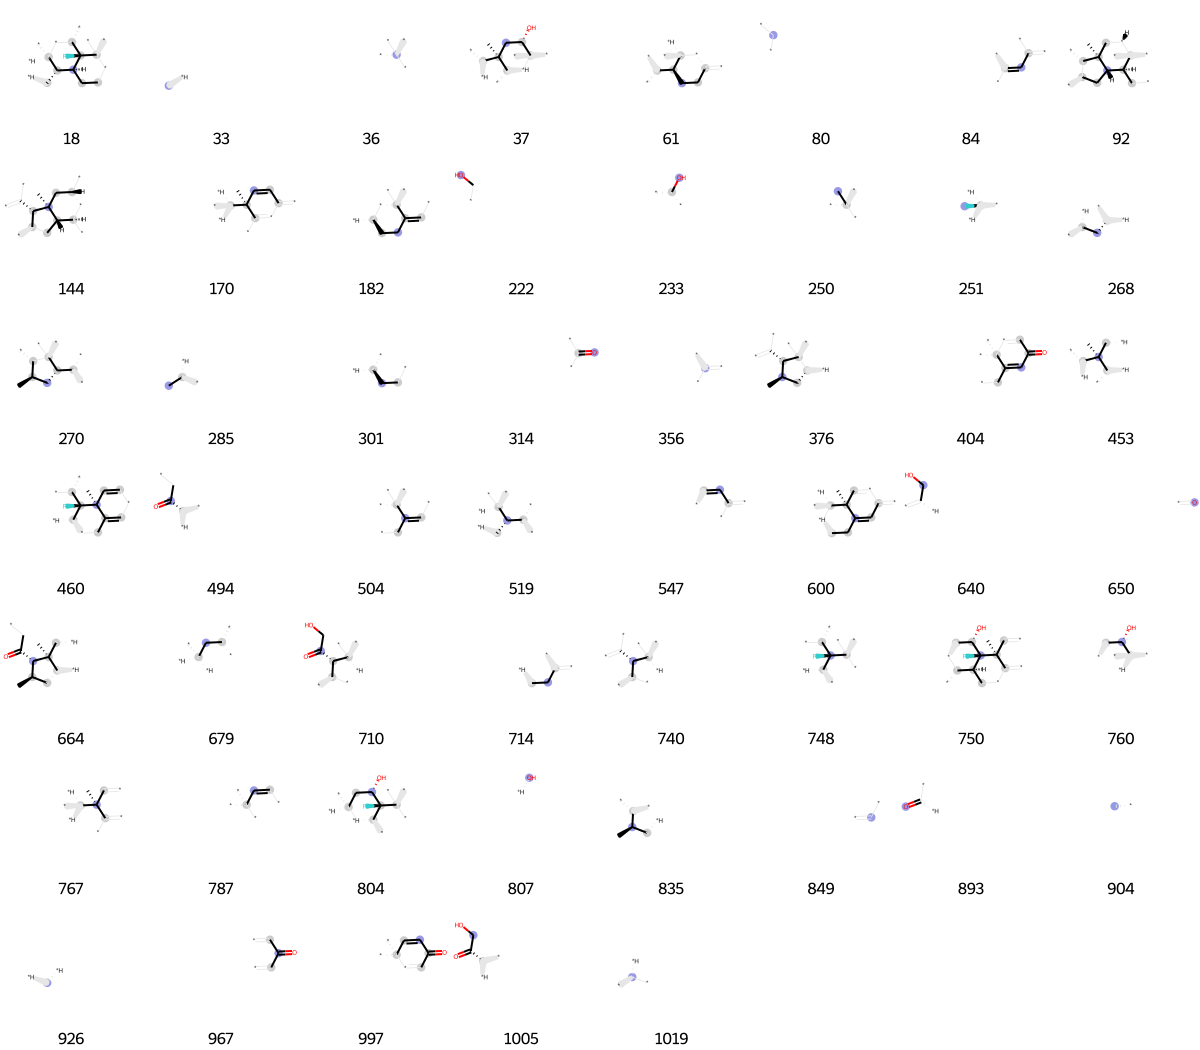

In [2507]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2508]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 33,
 43,
 56,
 75,
 80,
 121,
 128,
 136,
 147,
 275,
 294,
 303,
 327,
 333,
 352,
 356,
 361,
 378,
 380,
 392,
 409,
 428,
 451,
 464,
 493,
 511,
 520,
 550,
 572,
 578,
 583,
 587,
 594,
 606,
 669,
 678,
 726,
 738,
 785,
 786,
 787,
 796,
 807,
 815,
 831,
 842,
 849,
 873,
 875,
 896,
 926,
 935]

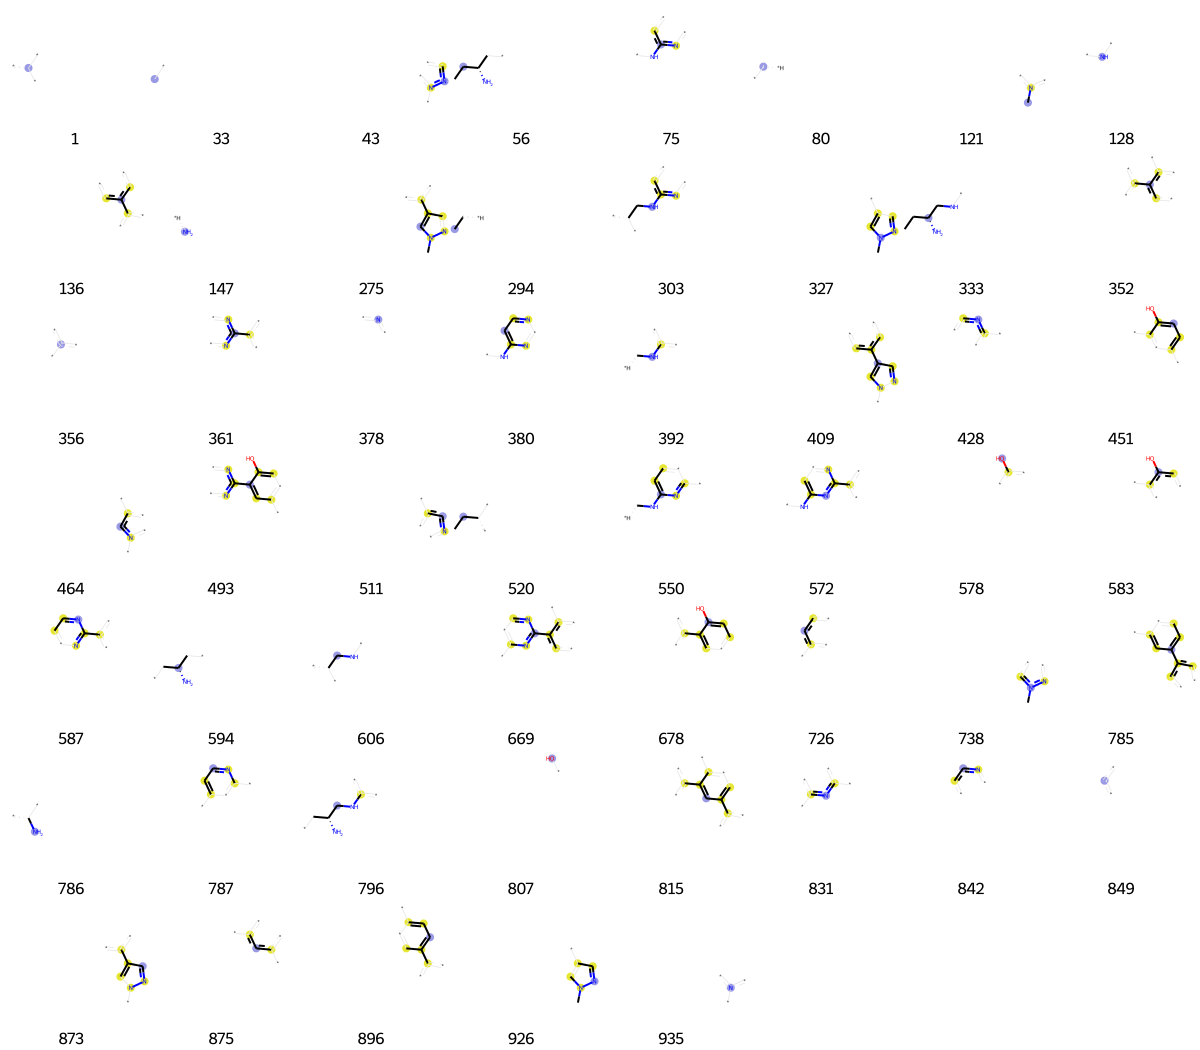

In [2509]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2510]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[14,
 15,
 33,
 36,
 40,
 76,
 81,
 121,
 128,
 134,
 173,
 191,
 207,
 210,
 212,
 233,
 250,
 289,
 317,
 323,
 345,
 356,
 378,
 381,
 406,
 407,
 428,
 456,
 458,
 484,
 486,
 490,
 491,
 499,
 500,
 511,
 544,
 558,
 562,
 611,
 650,
 687,
 726,
 801,
 807,
 831,
 843,
 849,
 879,
 893,
 926,
 930,
 932,
 935,
 940,
 953,
 968]

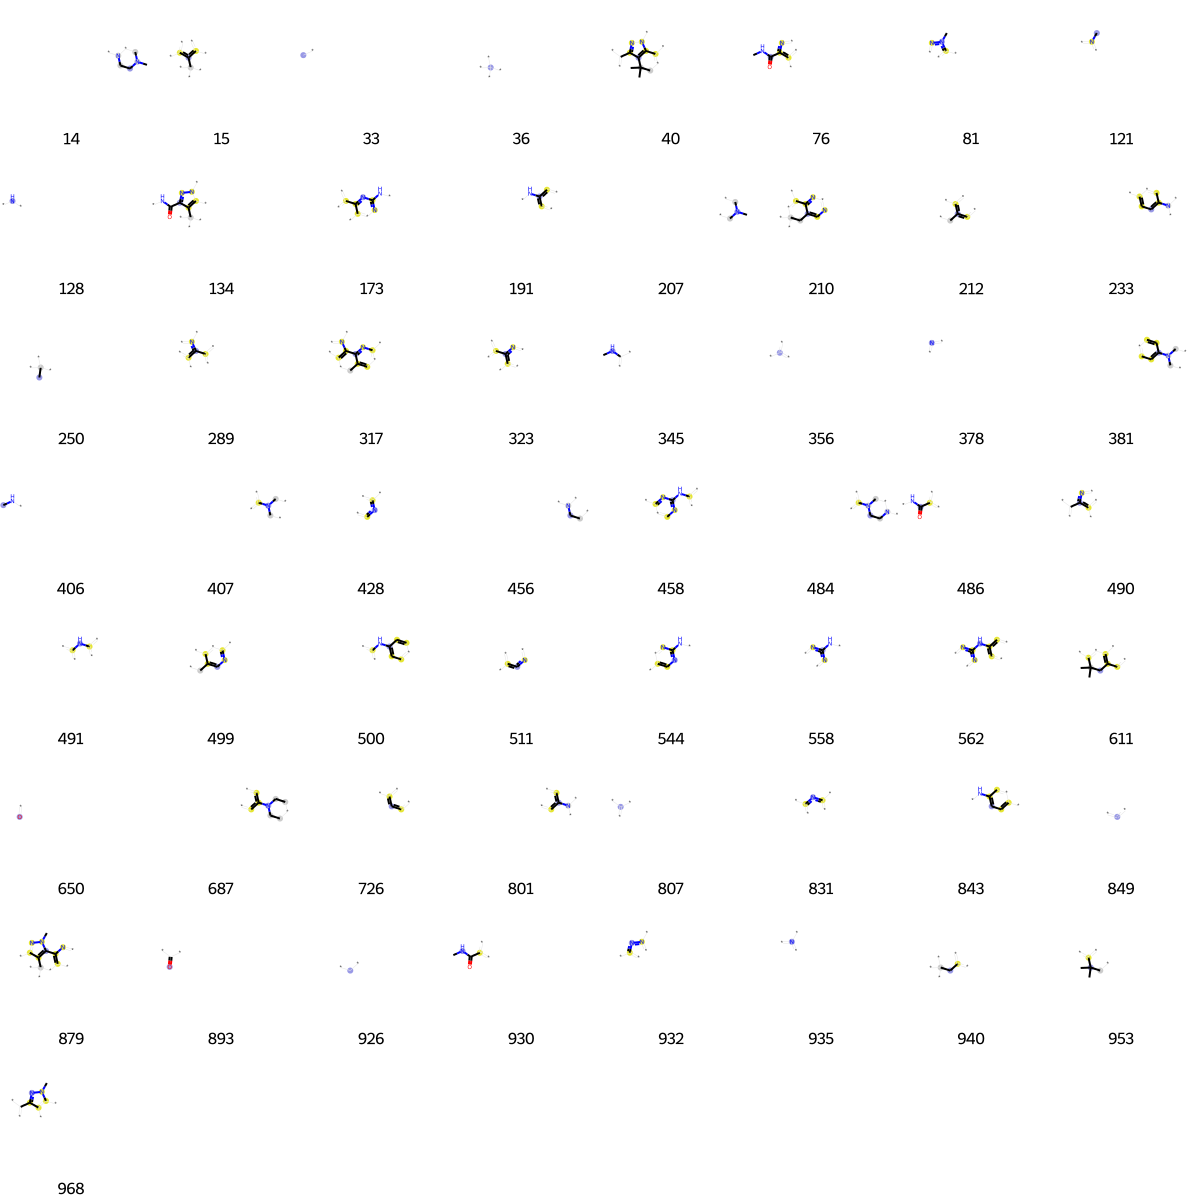

In [2511]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2512]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 15,
 33,
 36,
 49,
 75,
 118,
 130,
 138,
 212,
 250,
 289,
 301,
 356,
 364,
 381,
 408,
 412,
 441,
 455,
 507,
 519,
 529,
 555,
 561,
 578,
 622,
 636,
 649,
 674,
 713,
 714,
 726,
 745,
 807,
 823,
 849,
 875,
 909,
 915,
 926,
 974,
 1019]

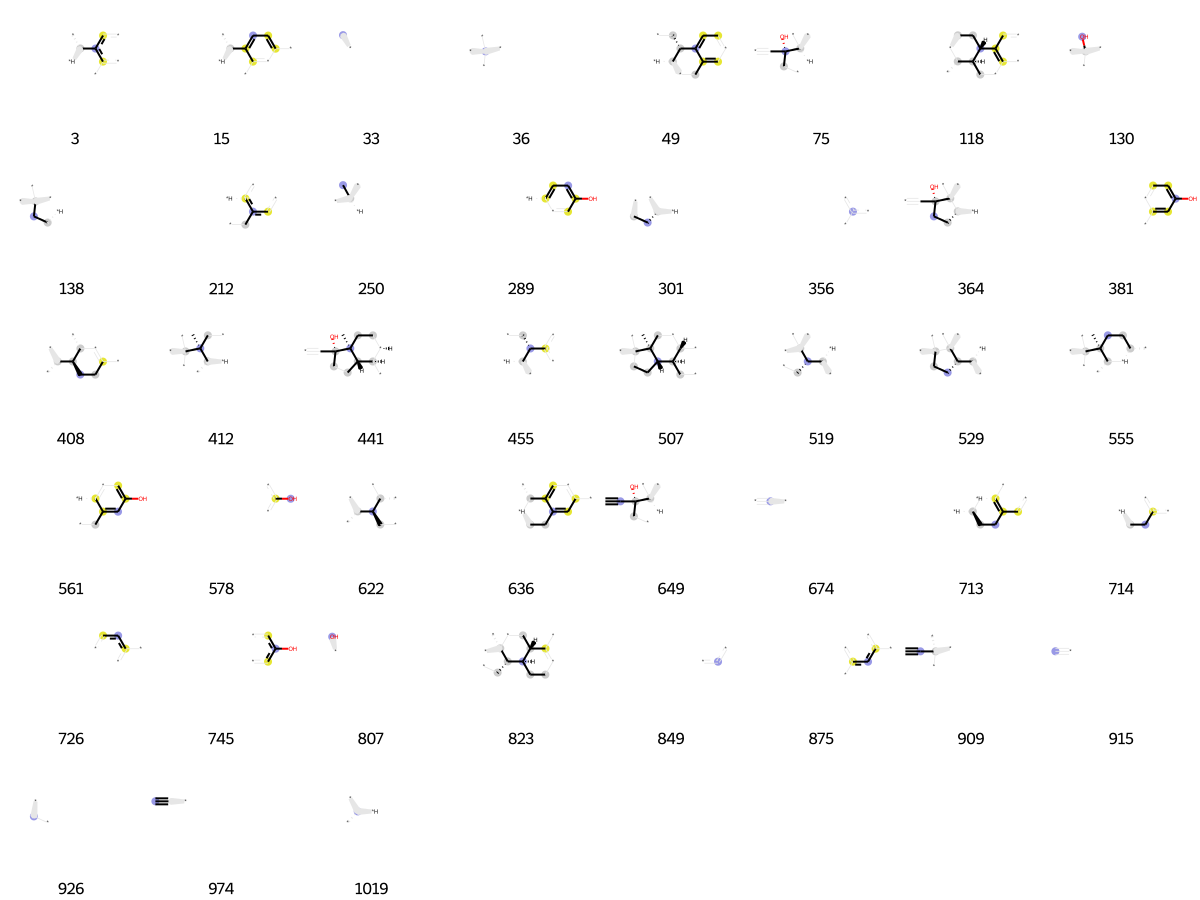

In [2513]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2514]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[2,
 4,
 8,
 21,
 33,
 80,
 94,
 128,
 165,
 197,
 216,
 219,
 235,
 249,
 293,
 301,
 307,
 310,
 319,
 331,
 350,
 352,
 356,
 387,
 428,
 452,
 454,
 483,
 486,
 502,
 512,
 561,
 582,
 610,
 631,
 650,
 659,
 667,
 695,
 715,
 726,
 730,
 738,
 807,
 816,
 828,
 841,
 849,
 875,
 883,
 890,
 893,
 926,
 946,
 965,
 967,
 1018,
 1019]

In [2515]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2516]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[4,
 15,
 40,
 56,
 64,
 90,
 284,
 305,
 309,
 314,
 333,
 350,
 356,
 366,
 392,
 445,
 452,
 456,
 475,
 492,
 539,
 549,
 582,
 585,
 650,
 661,
 726,
 800,
 806,
 849,
 894,
 897,
 926,
 935,
 947,
 992,
 996]

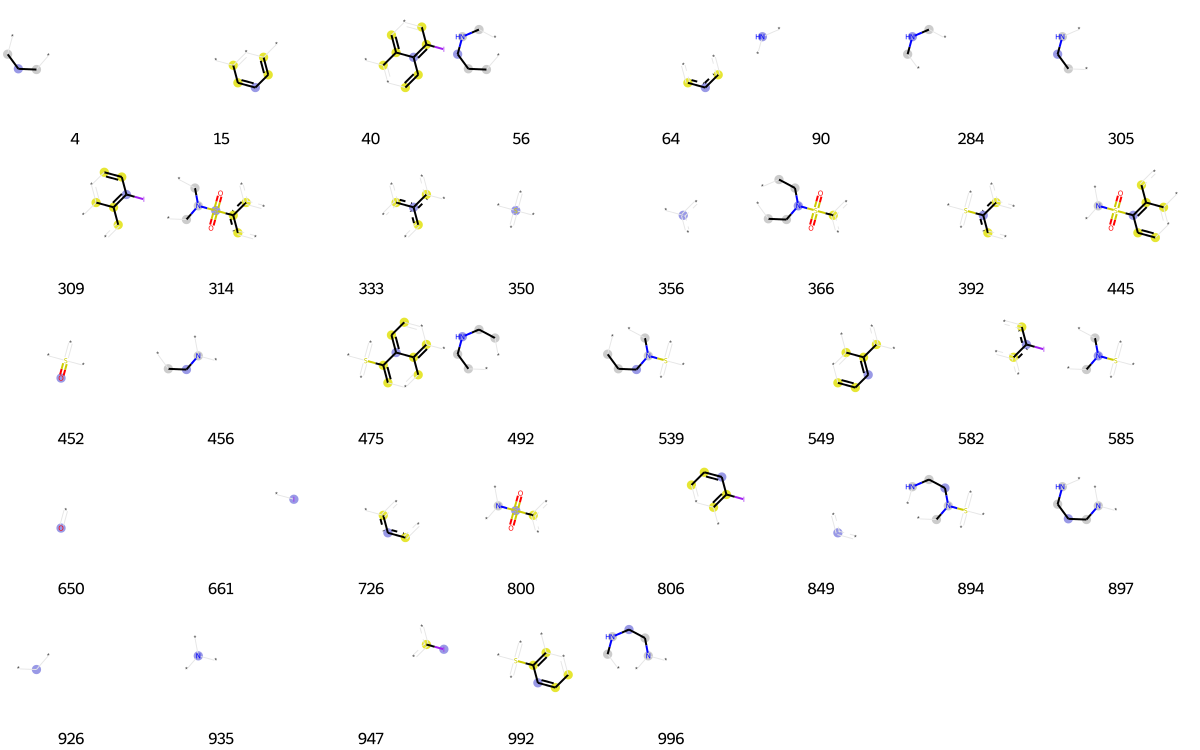

In [2517]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2518]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[46,
 53,
 56,
 128,
 184,
 191,
 216,
 356,
 366,
 378,
 530,
 557,
 561,
 650,
 659,
 666,
 726,
 792,
 807,
 816,
 843,
 849,
 875,
 893,
 965,
 966]

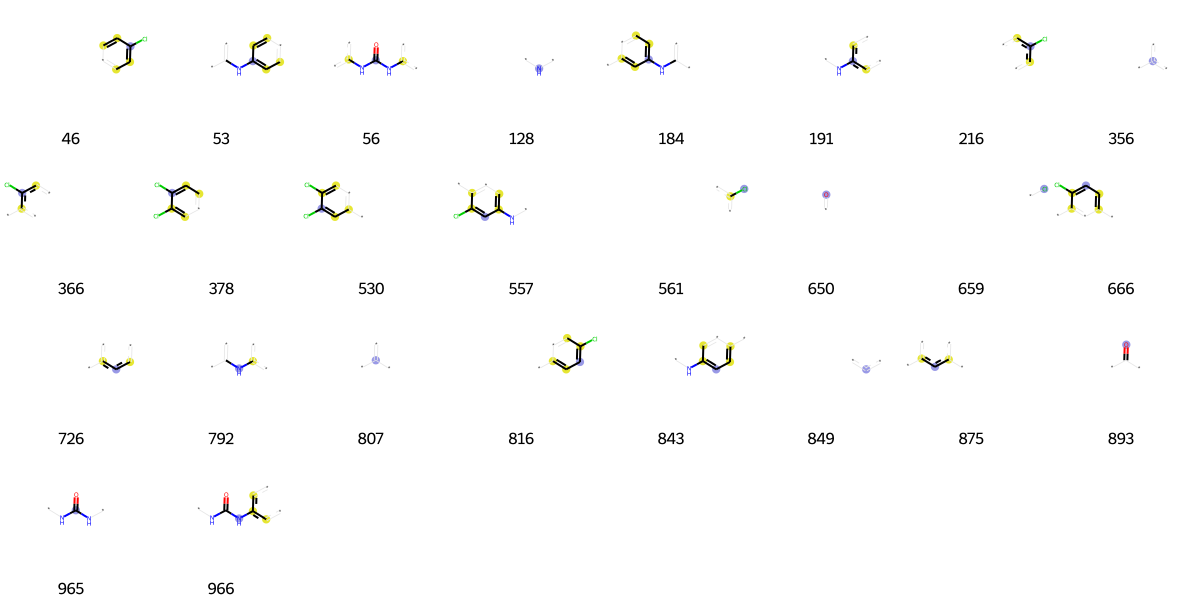

In [2519]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2520]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[10,
 13,
 33,
 61,
 64,
 80,
 92,
 102,
 139,
 147,
 169,
 175,
 248,
 322,
 356,
 362,
 378,
 389,
 428,
 461,
 518,
 539,
 540,
 562,
 578,
 613,
 642,
 650,
 654,
 656,
 677,
 695,
 698,
 726,
 745,
 807,
 835,
 849,
 893,
 1010]

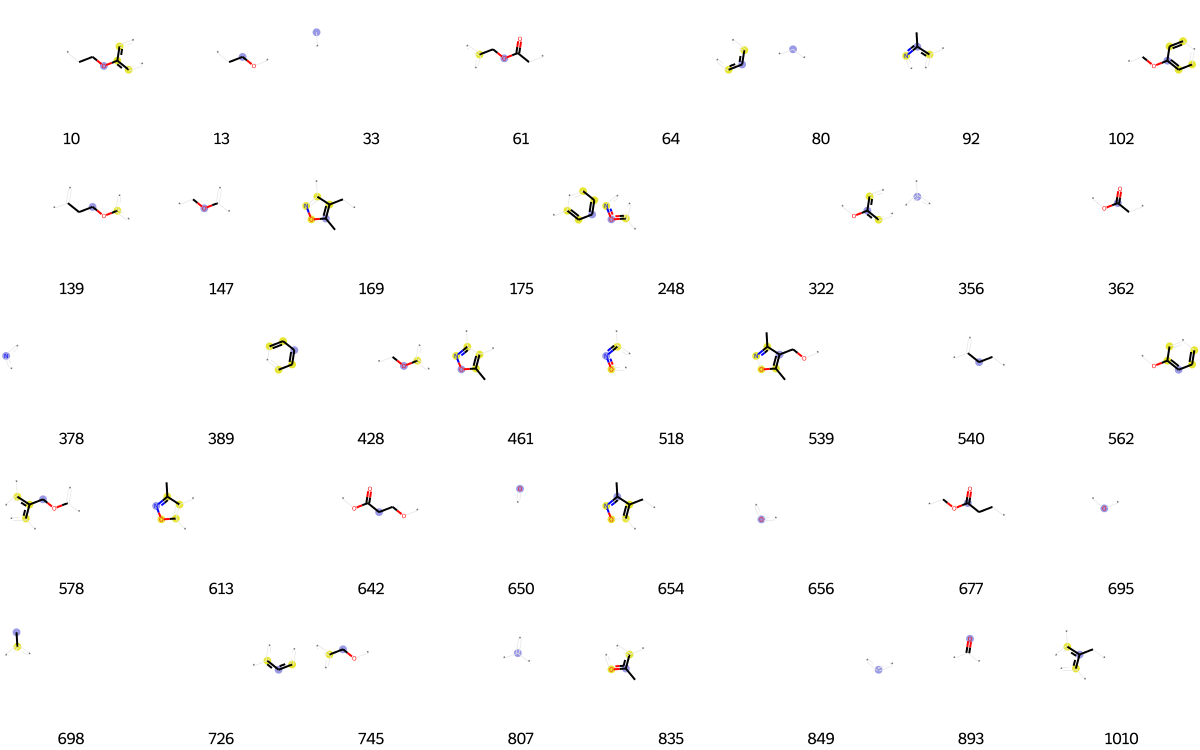

In [2521]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2522]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 26,
 33,
 94,
 118,
 136,
 147,
 173,
 233,
 249,
 259,
 304,
 305,
 319,
 350,
 356,
 375,
 378,
 381,
 416,
 452,
 465,
 501,
 512,
 583,
 625,
 650,
 668,
 695,
 699,
 715,
 726,
 756,
 801,
 816,
 822,
 828,
 833,
 841,
 849,
 875,
 896,
 904,
 921,
 932,
 935,
 946,
 991]

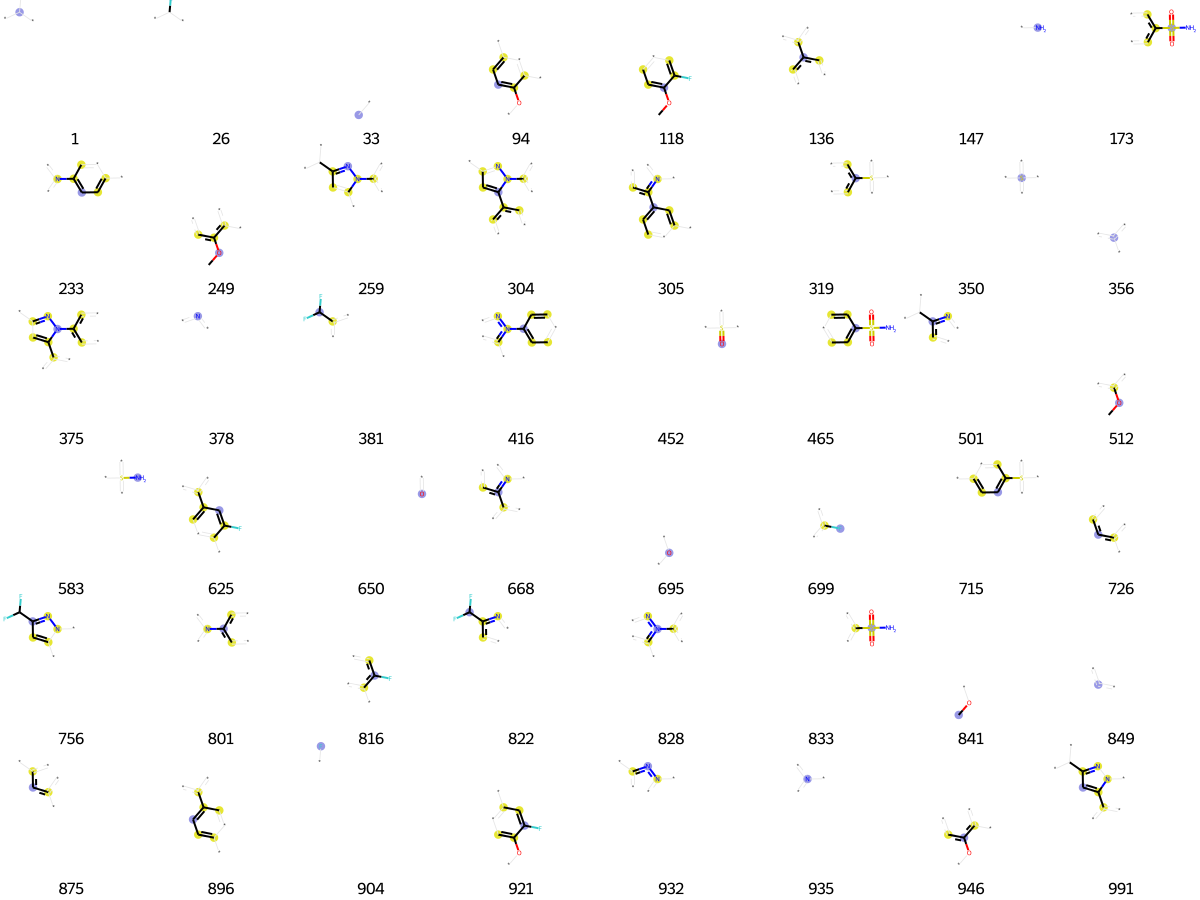

In [2523]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2524]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[3,
 14,
 33,
 39,
 42,
 64,
 80,
 107,
 171,
 175,
 314,
 322,
 333,
 356,
 367,
 389,
 406,
 428,
 477,
 580,
 650,
 654,
 656,
 695,
 698,
 709,
 718,
 726,
 730,
 745,
 779,
 784,
 803,
 849,
 852,
 875,
 1018]

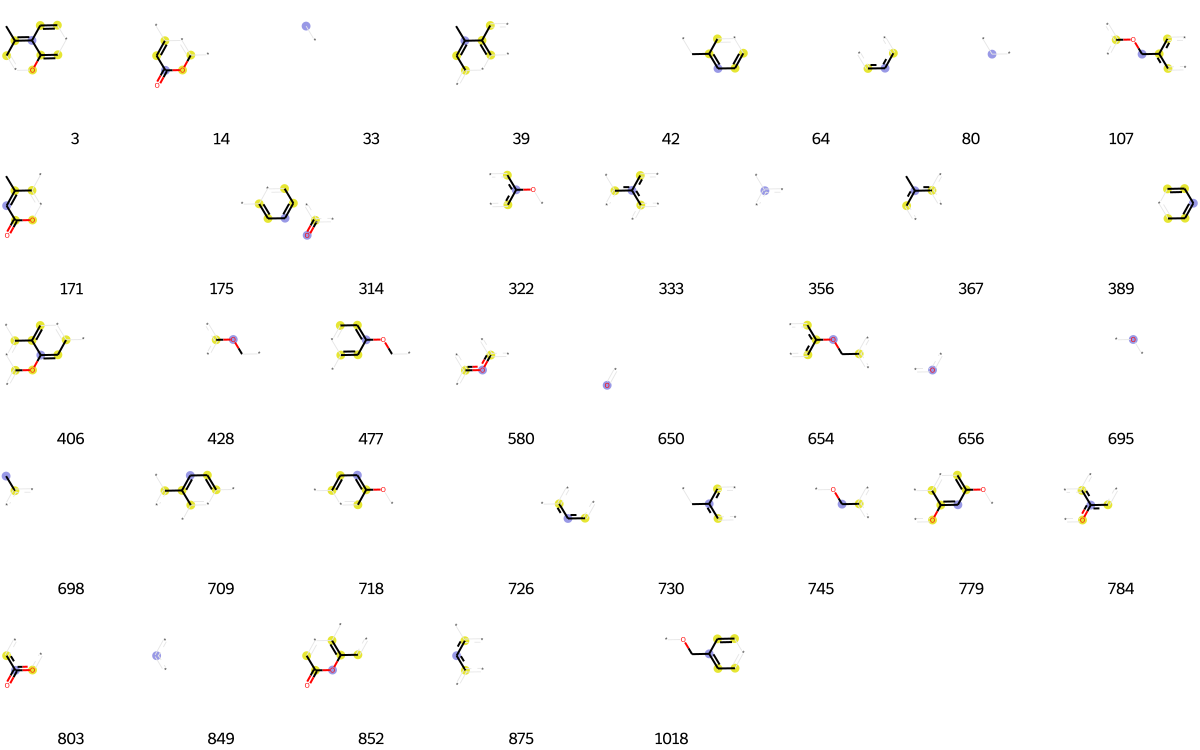

In [2525]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2526]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 80,
 93,
 294,
 335,
 356,
 378,
 394,
 451,
 525,
 578,
 583,
 698,
 707,
 726,
 734,
 775,
 807,
 831,
 849,
 873]

In [2527]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2528]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 21,
 53,
 72,
 80,
 85,
 86,
 219,
 263,
 310,
 356,
 389,
 423,
 432,
 540,
 602,
 650,
 659,
 663,
 713,
 717,
 726,
 730,
 807,
 849,
 881,
 887,
 893,
 927,
 960,
 978]

In [2529]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2530]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[15,
 64,
 73,
 102,
 111,
 128,
 133,
 149,
 191,
 202,
 225,
 231,
 329,
 333,
 343,
 356,
 378,
 381,
 428,
 441,
 489,
 491,
 505,
 523,
 605,
 627,
 656,
 673,
 674,
 703,
 708,
 710,
 726,
 738,
 786,
 794,
 836,
 849,
 875,
 881,
 888,
 915,
 926,
 950,
 974,
 997]

In [2531]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2532]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 3,
 12,
 19,
 33,
 42,
 55,
 57,
 64,
 74,
 79,
 80,
 114,
 128,
 159,
 175,
 181,
 212,
 227,
 231,
 233,
 257,
 258,
 284,
 354,
 356,
 364,
 371,
 372,
 378,
 387,
 389,
 392,
 437,
 440,
 456,
 489,
 511,
 531,
 562,
 573,
 579,
 585,
 603,
 636,
 645,
 650,
 658,
 680,
 682,
 684,
 689,
 726,
 730,
 731,
 739,
 741,
 747,
 767,
 807,
 842,
 849,
 853,
 857,
 864,
 873,
 886,
 893,
 898,
 926,
 933,
 935,
 998,
 1014,
 1019]

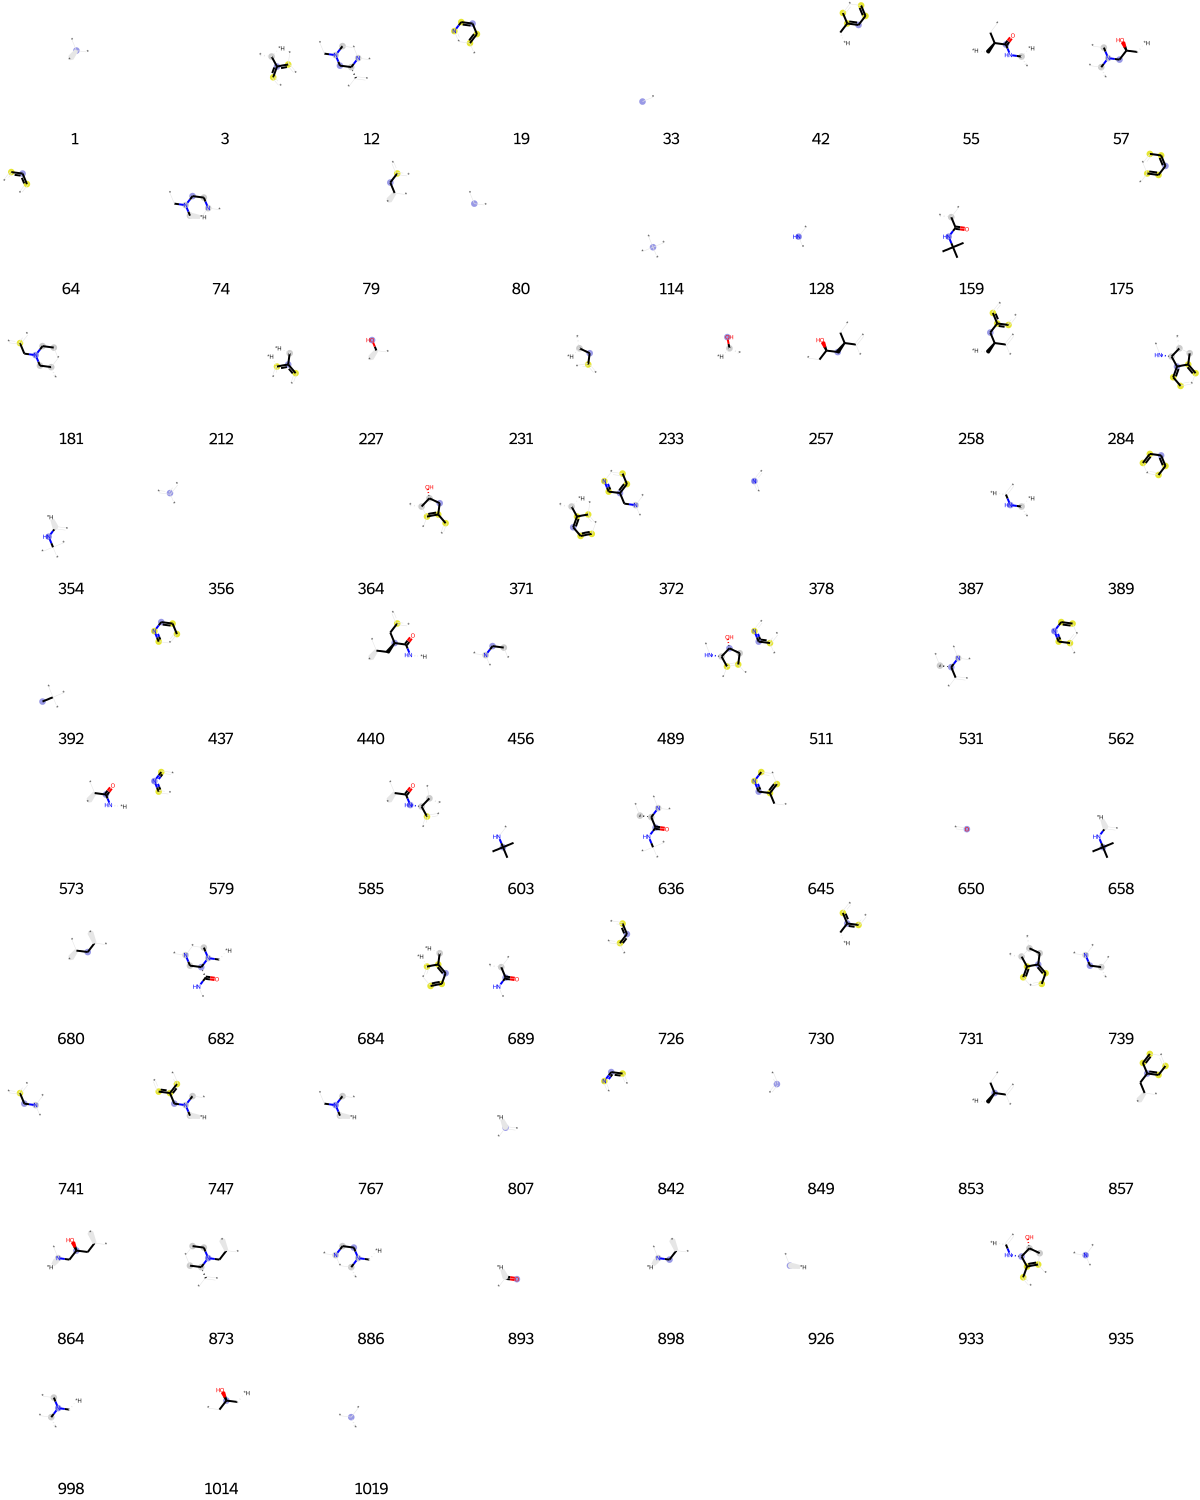

In [2533]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2534]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 80,
 119,
 128,
 164,
 169,
 190,
 197,
 222,
 231,
 233,
 239,
 245,
 268,
 271,
 280,
 314,
 356,
 367,
 407,
 433,
 456,
 484,
 565,
 580,
 606,
 608,
 640,
 650,
 656,
 699,
 716,
 726,
 731,
 739,
 750,
 760,
 801,
 807,
 816,
 849,
 872,
 875,
 891,
 893,
 904,
 906,
 926,
 935,
 952,
 985,
 1009,
 1017,
 1019]

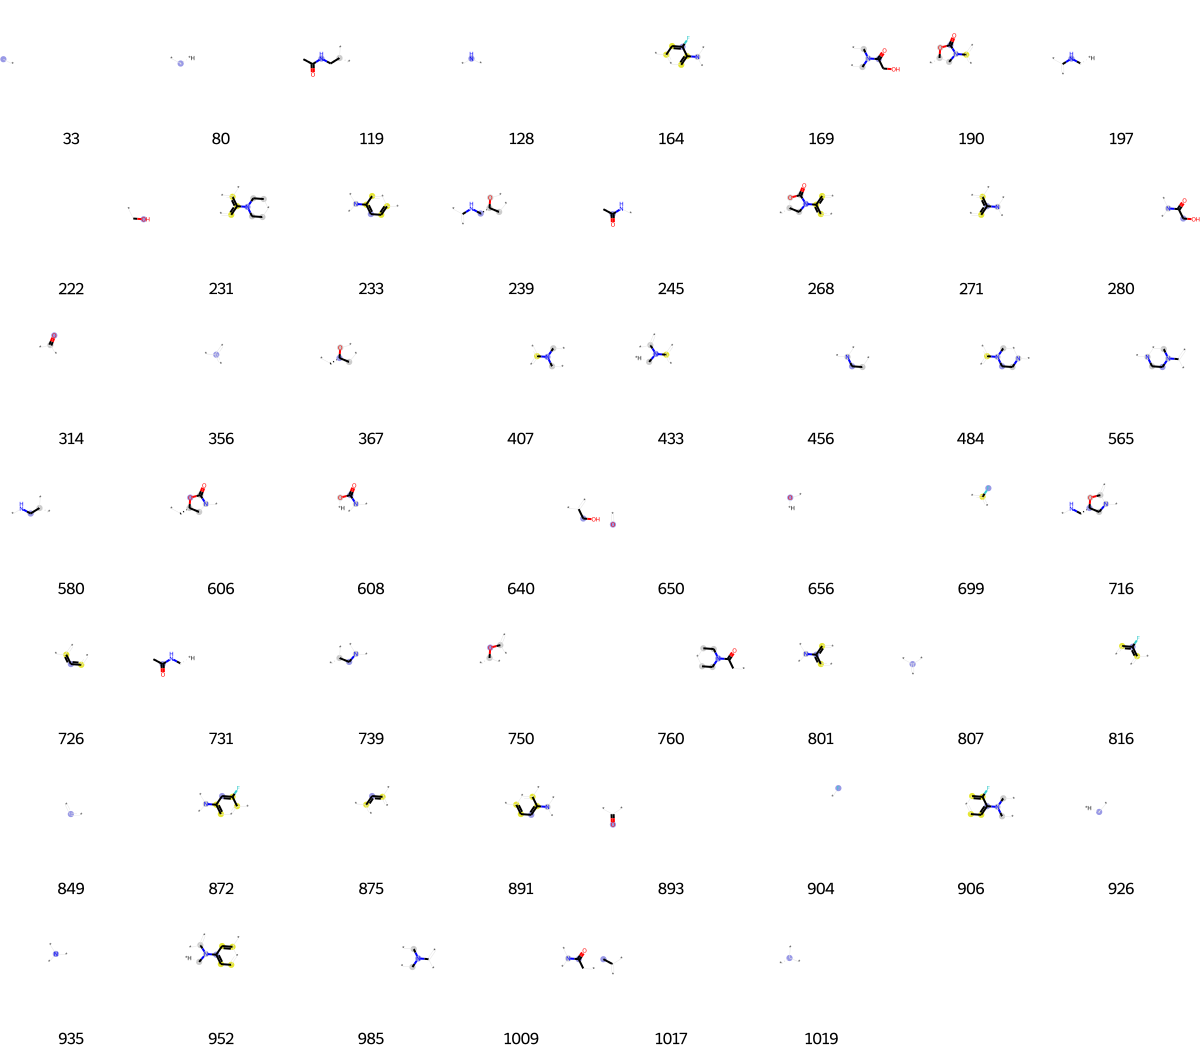

In [2535]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2536]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[33,
 128,
 163,
 165,
 171,
 200,
 216,
 246,
 250,
 263,
 276,
 350,
 356,
 366,
 367,
 392,
 418,
 452,
 485,
 492,
 502,
 503,
 561,
 650,
 659,
 666,
 698,
 715,
 726,
 753,
 766,
 785,
 790,
 816,
 832,
 838,
 849,
 875,
 916,
 939]

In [2537]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2538]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[12,
 90,
 126,
 162,
 164,
 171,
 210,
 294,
 305,
 314,
 356,
 378,
 404,
 419,
 428,
 433,
 456,
 511,
 515,
 577,
 646,
 650,
 675,
 715,
 753,
 838,
 842,
 849,
 926,
 935,
 939,
 957]

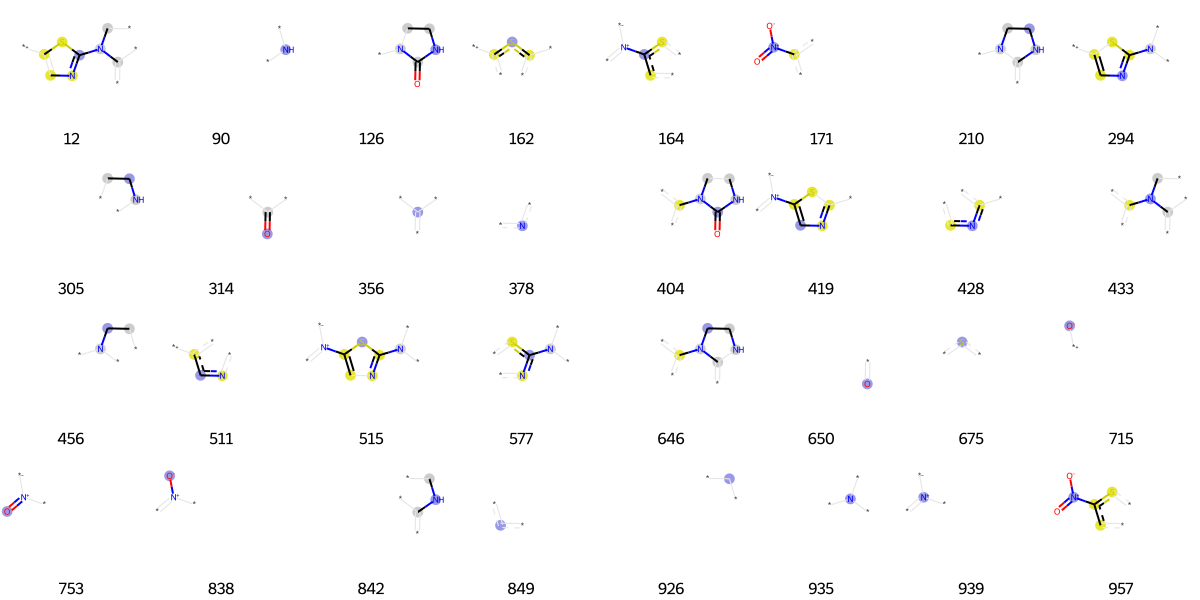

In [2539]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2540]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[36,
 64,
 73,
 128,
 156,
 162,
 175,
 184,
 191,
 268,
 310,
 317,
 356,
 361,
 378,
 385,
 389,
 422,
 486,
 518,
 557,
 622,
 624,
 641,
 645,
 650,
 675,
 679,
 714,
 716,
 726,
 769,
 771,
 792,
 807,
 831,
 843,
 849,
 875,
 882,
 885,
 893,
 926,
 952,
 961,
 1004,
 1019]

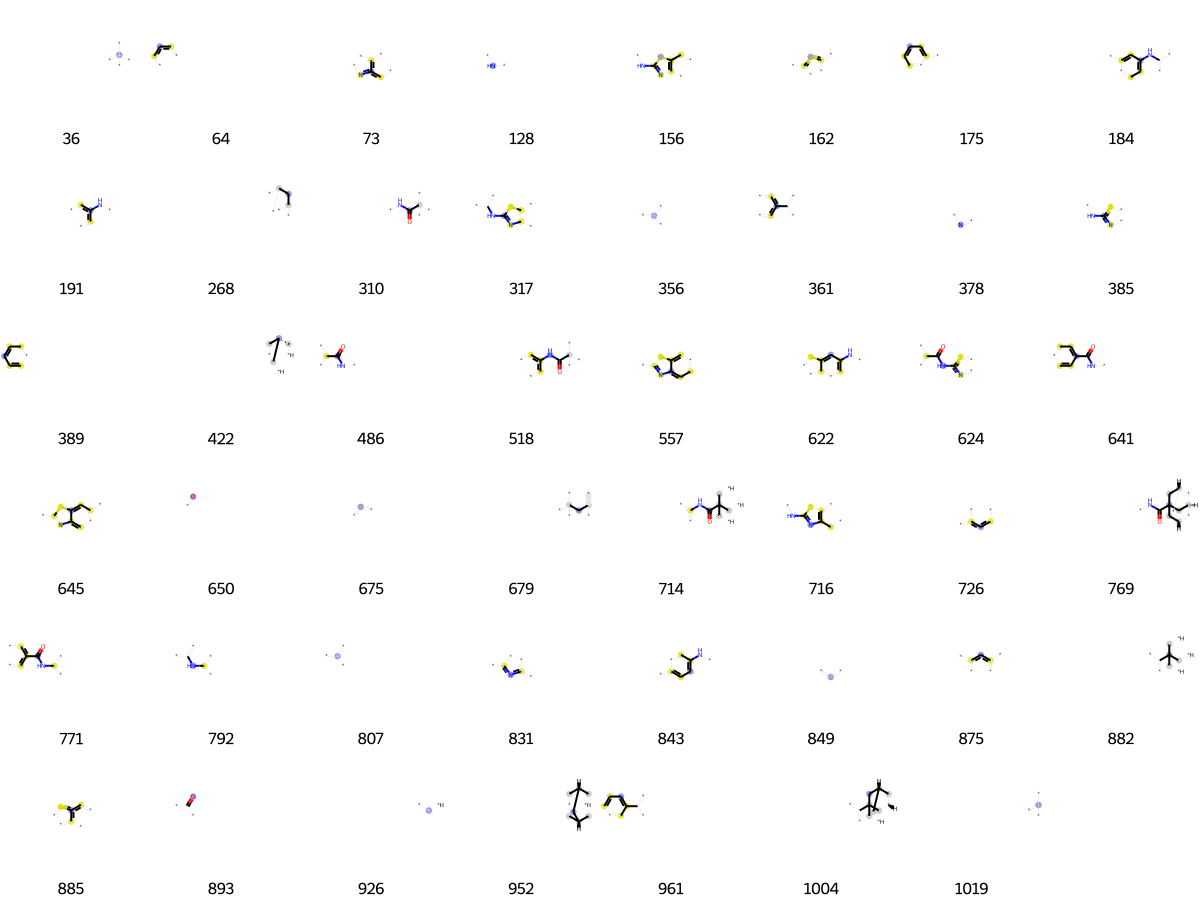

In [2541]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2542]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[0,
 1,
 29,
 33,
 36,
 37,
 43,
 70,
 80,
 84,
 99,
 102,
 112,
 135,
 136,
 137,
 143,
 144,
 173,
 227,
 231,
 233,
 236,
 283,
 294,
 314,
 322,
 356,
 364,
 378,
 381,
 386,
 407,
 425,
 428,
 456,
 463,
 484,
 489,
 520,
 548,
 564,
 579,
 629,
 646,
 650,
 651,
 656,
 669,
 677,
 679,
 687,
 695,
 699,
 718,
 726,
 747,
 749,
 754,
 771,
 801,
 803,
 807,
 816,
 839,
 840,
 849,
 861,
 875,
 899,
 904,
 911,
 926,
 932,
 933,
 935,
 956,
 983,
 1017,
 1019]

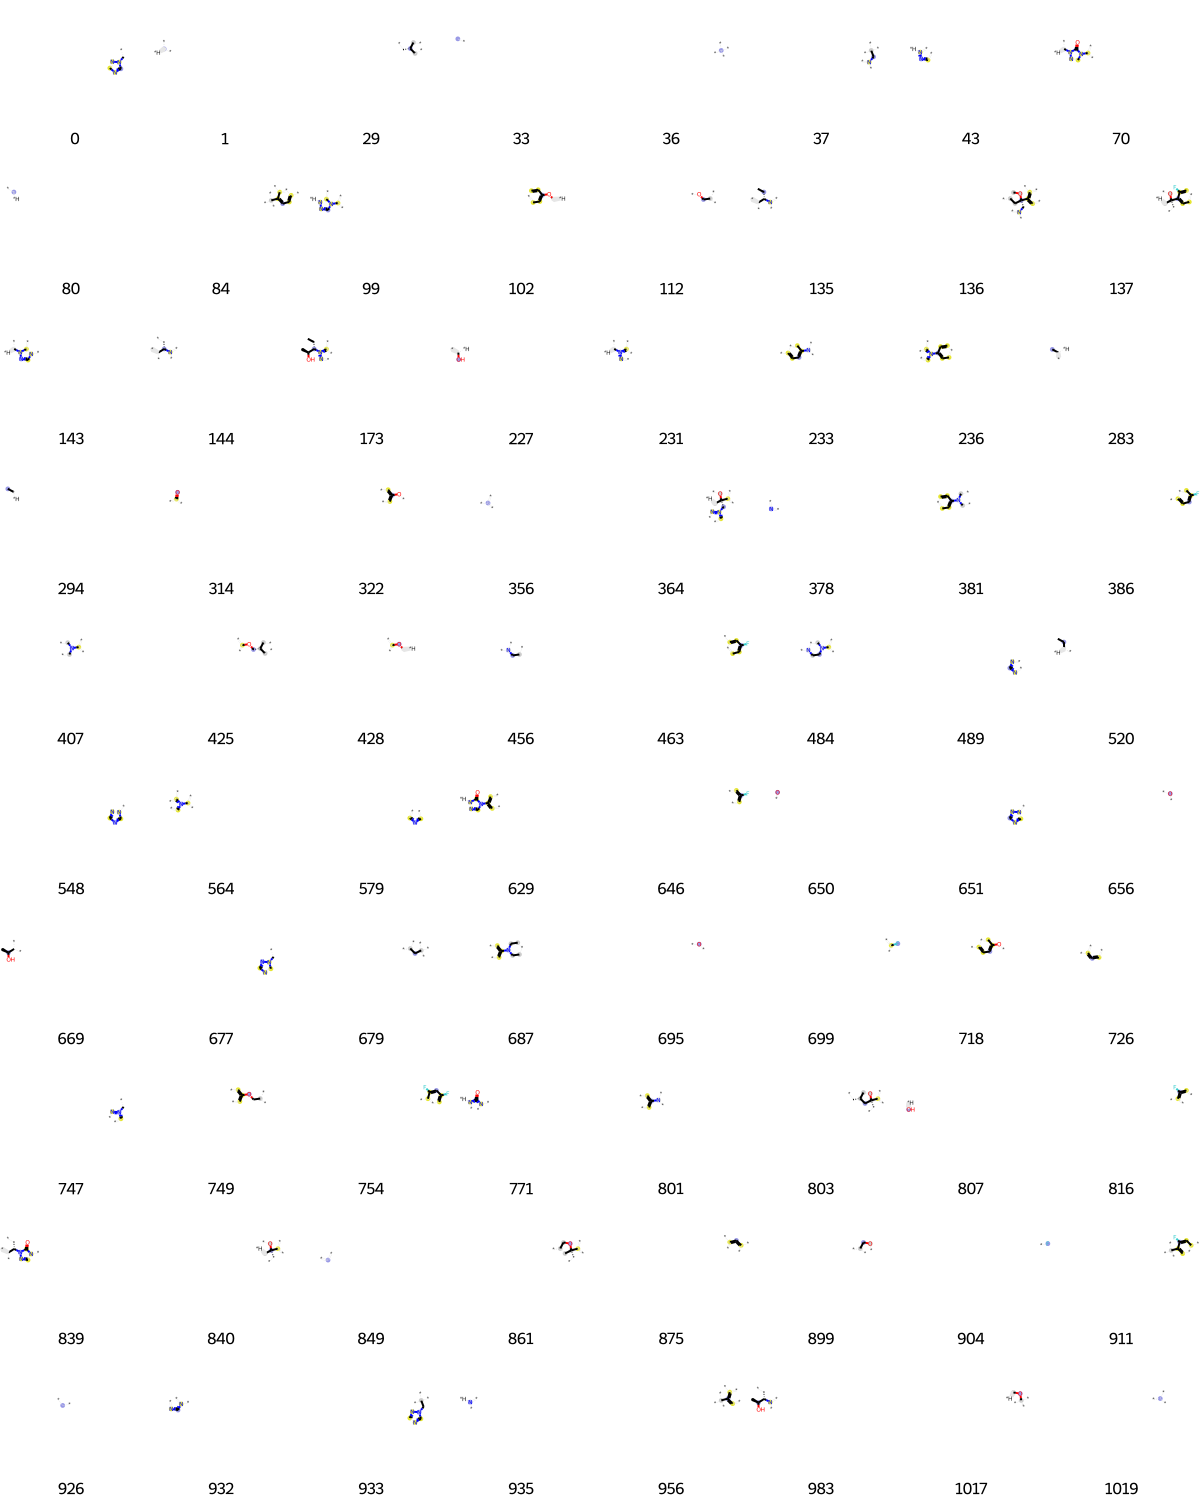

In [2543]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2544]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[0,
 14,
 59,
 64,
 101,
 114,
 128,
 191,
 241,
 246,
 328,
 350,
 356,
 383,
 393,
 429,
 452,
 497,
 502,
 543,
 628,
 641,
 650,
 661,
 675,
 726,
 735,
 743,
 807,
 841,
 843,
 849,
 884,
 904,
 965,
 1011]

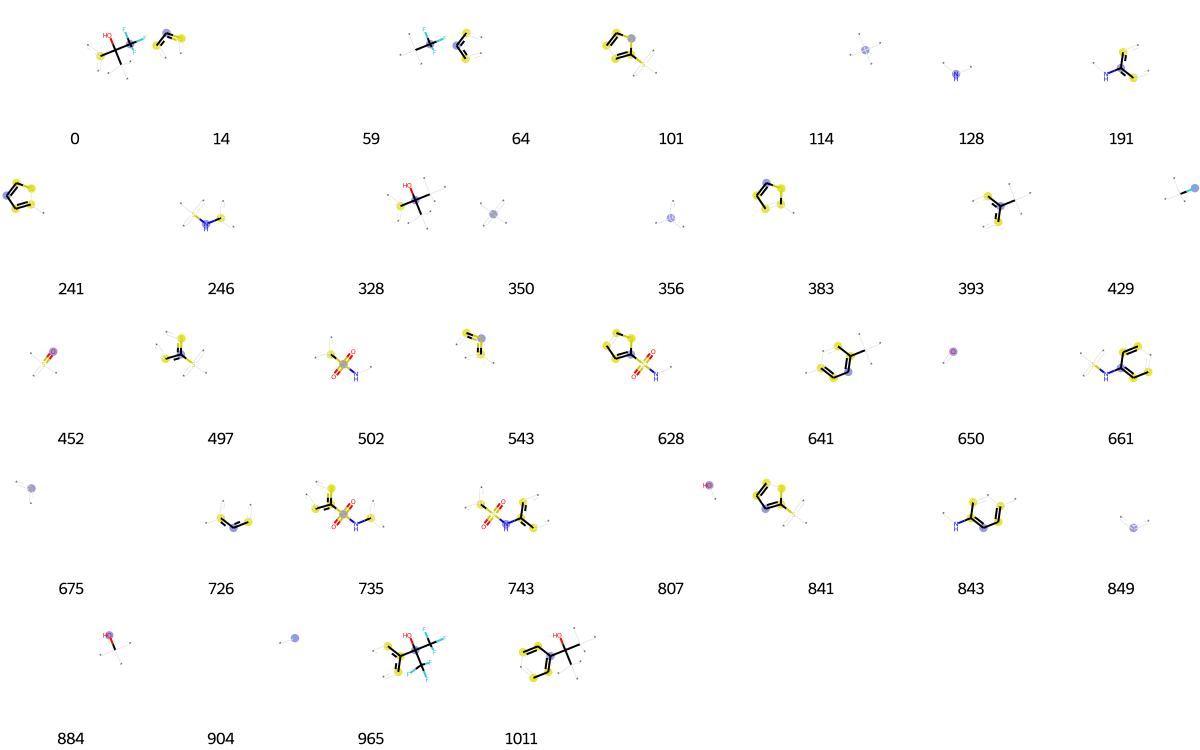

In [2545]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2546]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[42,
 43,
 64,
 73,
 80,
 90,
 167,
 175,
 183,
 184,
 197,
 314,
 322,
 333,
 356,
 378,
 389,
 464,
 469,
 511,
 562,
 568,
 579,
 585,
 593,
 611,
 621,
 650,
 659,
 662,
 695,
 721,
 726,
 730,
 741,
 747,
 750,
 754,
 776,
 813,
 815,
 831,
 842,
 849,
 935,
 958,
 1002,
 1020]

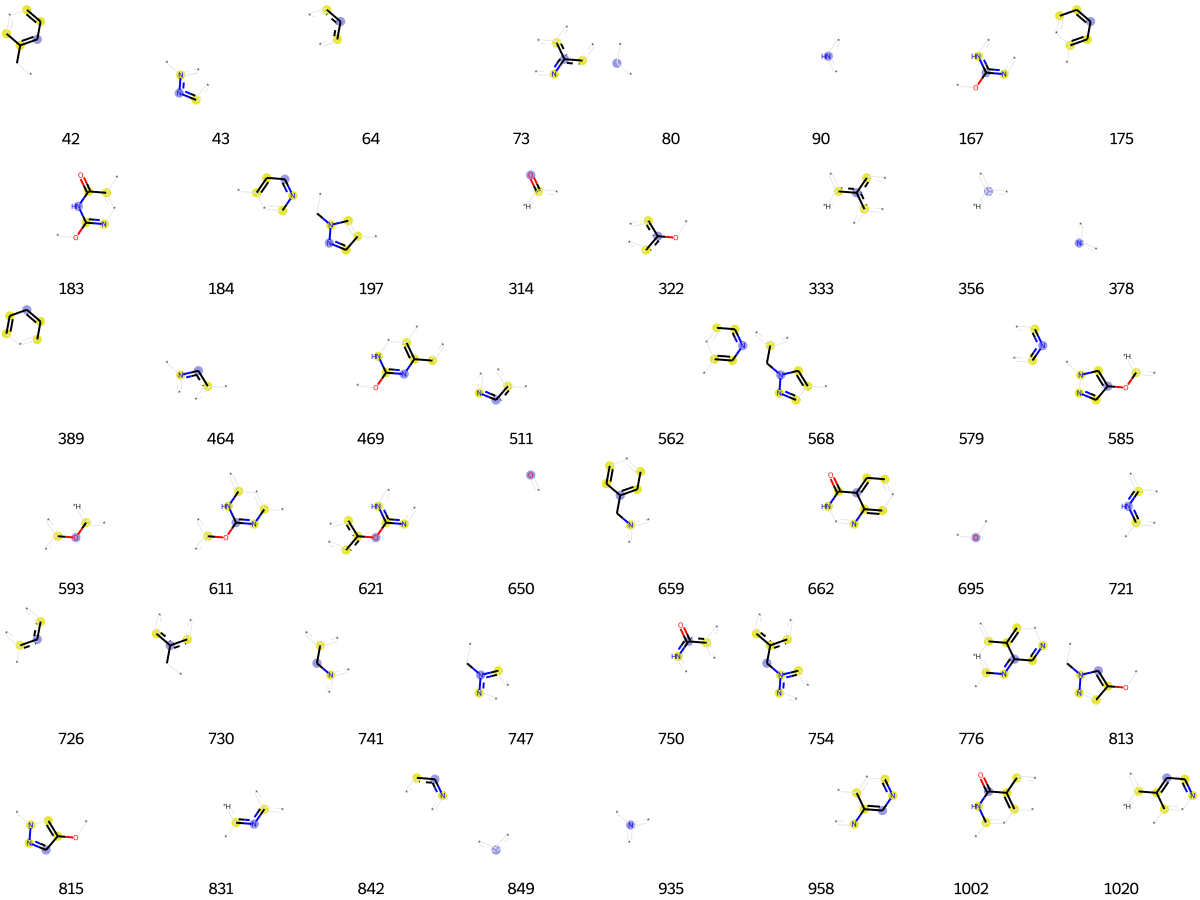

In [2547]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2548]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 36,
 46,
 98,
 267,
 271,
 285,
 301,
 449,
 453,
 456,
 462,
 528,
 549,
 602,
 656,
 675,
 731,
 852,
 853,
 875,
 893,
 926,
 935,
 998,
 1007,
 1019]

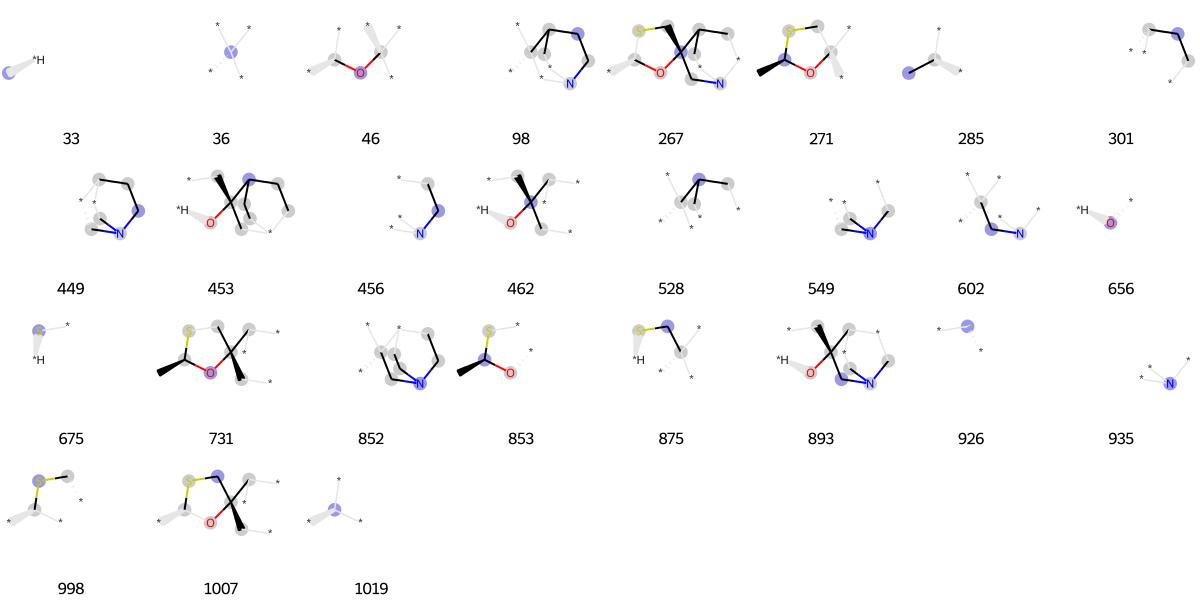

In [2549]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2550]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 8,
 33,
 43,
 45,
 59,
 80,
 85,
 94,
 118,
 128,
 139,
 158,
 181,
 197,
 253,
 283,
 293,
 356,
 378,
 386,
 416,
 463,
 486,
 511,
 515,
 576,
 593,
 616,
 624,
 625,
 646,
 650,
 652,
 667,
 690,
 693,
 695,
 699,
 726,
 729,
 738,
 754,
 807,
 816,
 823,
 831,
 849,
 875,
 881,
 893,
 898,
 904,
 921,
 927,
 935,
 946,
 967,
 1009]

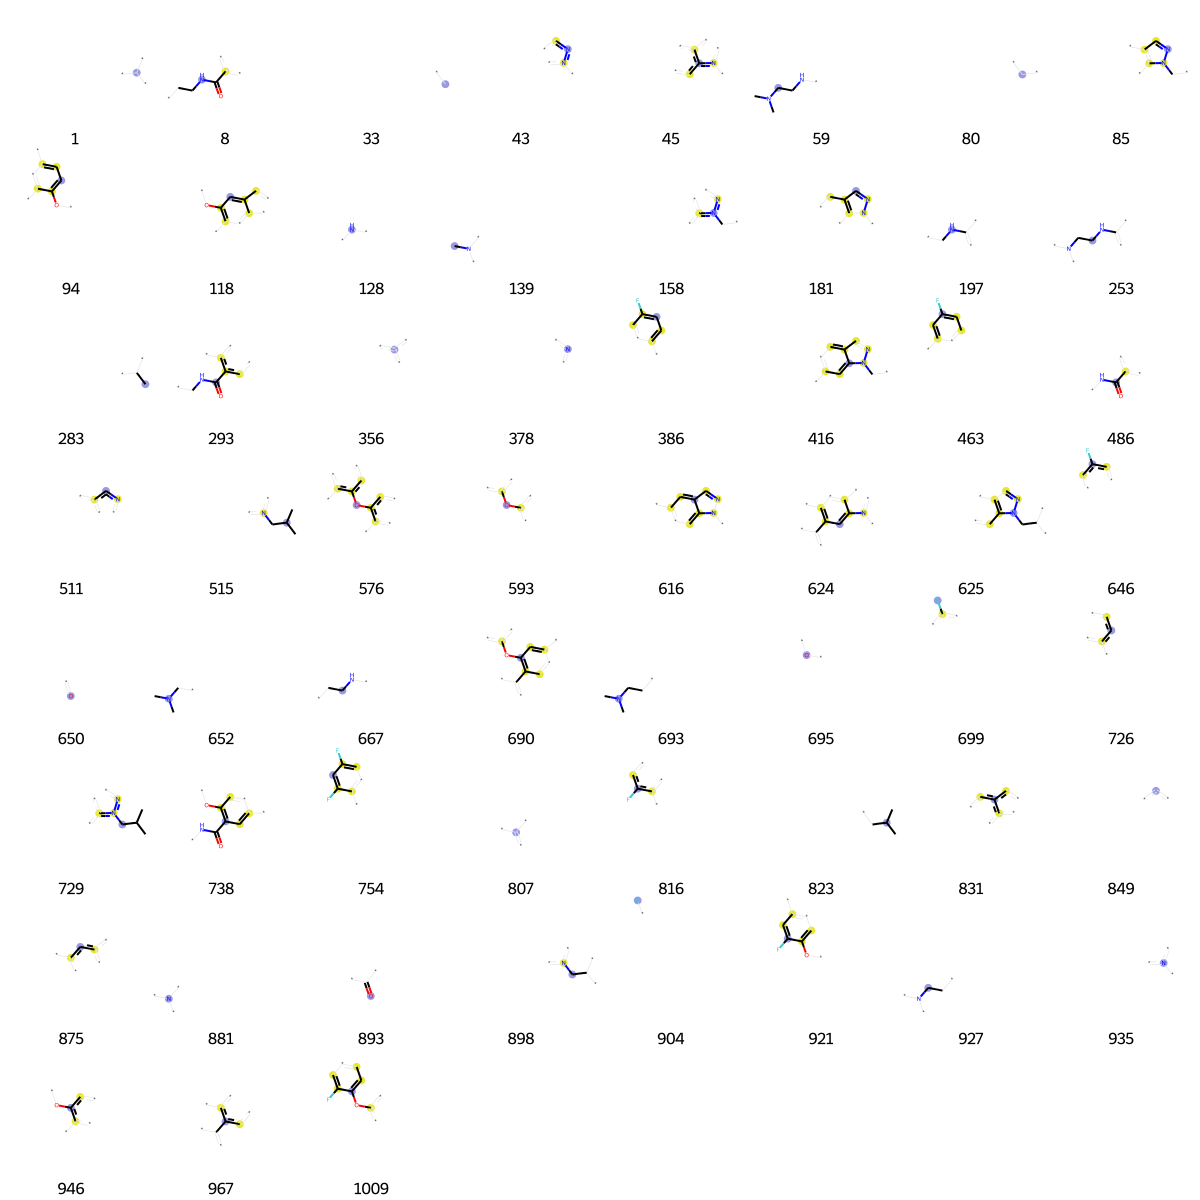

In [2551]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2552]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 80,
 119,
 157,
 160,
 219,
 289,
 294,
 325,
 356,
 381,
 420,
 483,
 503,
 578,
 583,
 591,
 699,
 717,
 726,
 745,
 794,
 807,
 849,
 875,
 887]

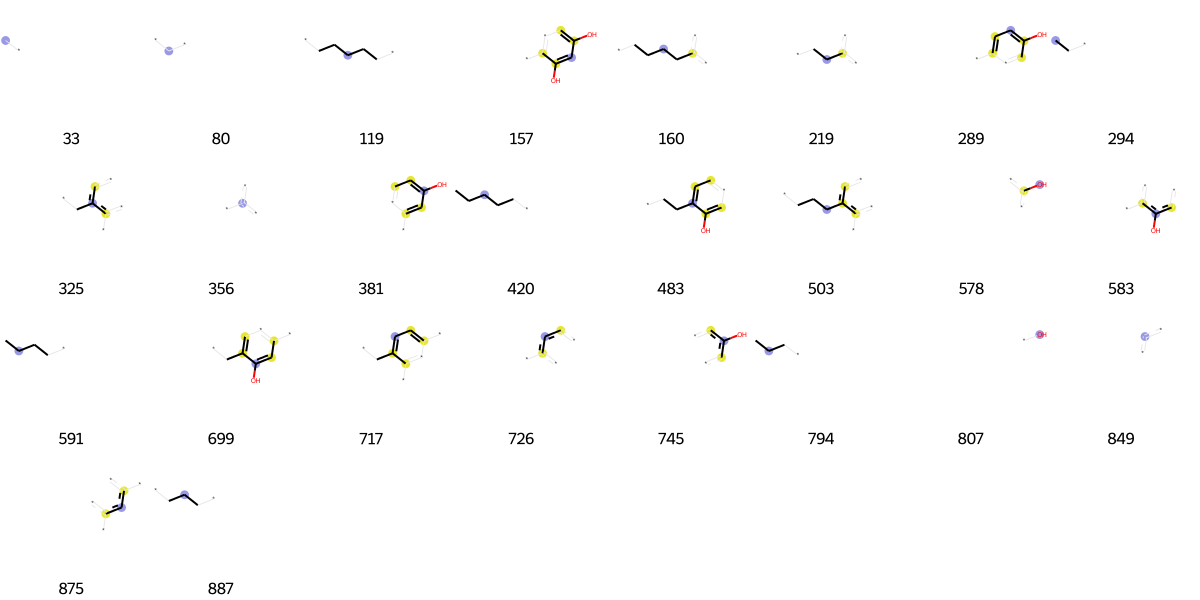

In [2553]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2554]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 41,
 58,
 80,
 115,
 119,
 128,
 147,
 152,
 197,
 214,
 373,
 491,
 493,
 530,
 540,
 564,
 565,
 592,
 597,
 645,
 650,
 667,
 735,
 747,
 807,
 816,
 840,
 852,
 881,
 887,
 893,
 927,
 981,
 1017]

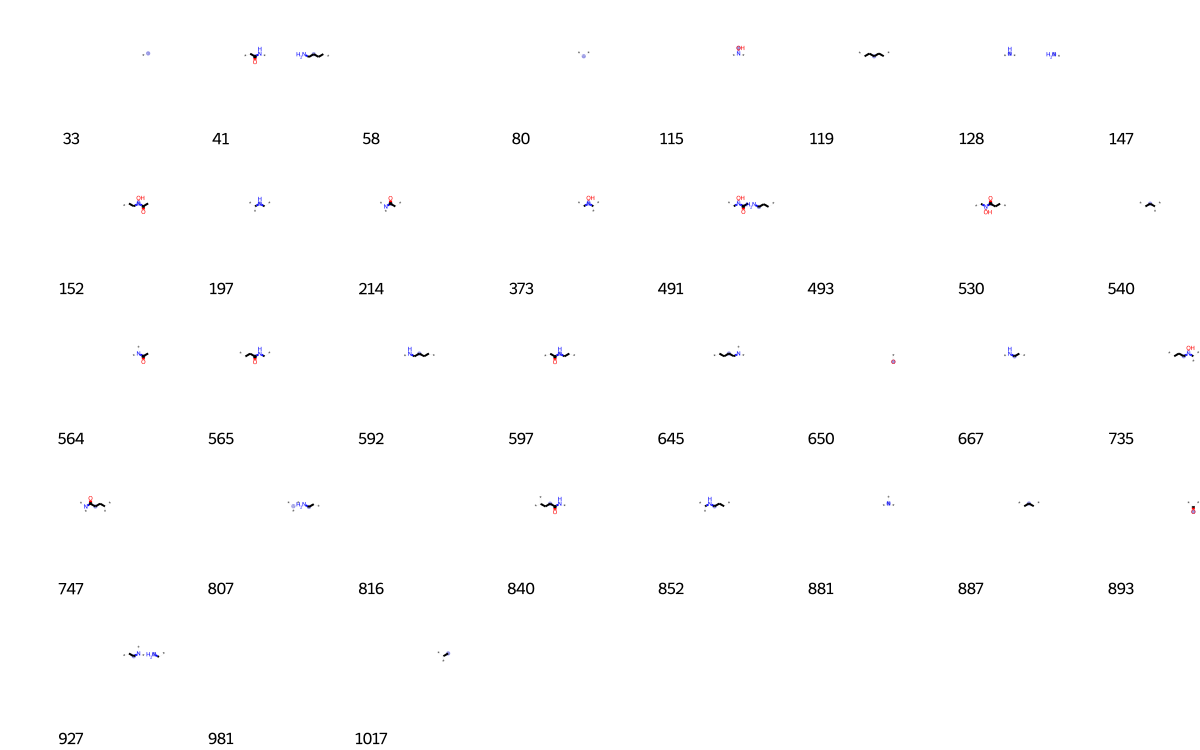

In [2555]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2556]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[23,
 33,
 34,
 45,
 61,
 80,
 90,
 164,
 213,
 231,
 271,
 284,
 294,
 305,
 308,
 314,
 333,
 356,
 389,
 407,
 429,
 431,
 453,
 456,
 464,
 492,
 525,
 551,
 650,
 699,
 705,
 713,
 804,
 807,
 816,
 849,
 875,
 880,
 893,
 904,
 926,
 935,
 967,
 974,
 996]

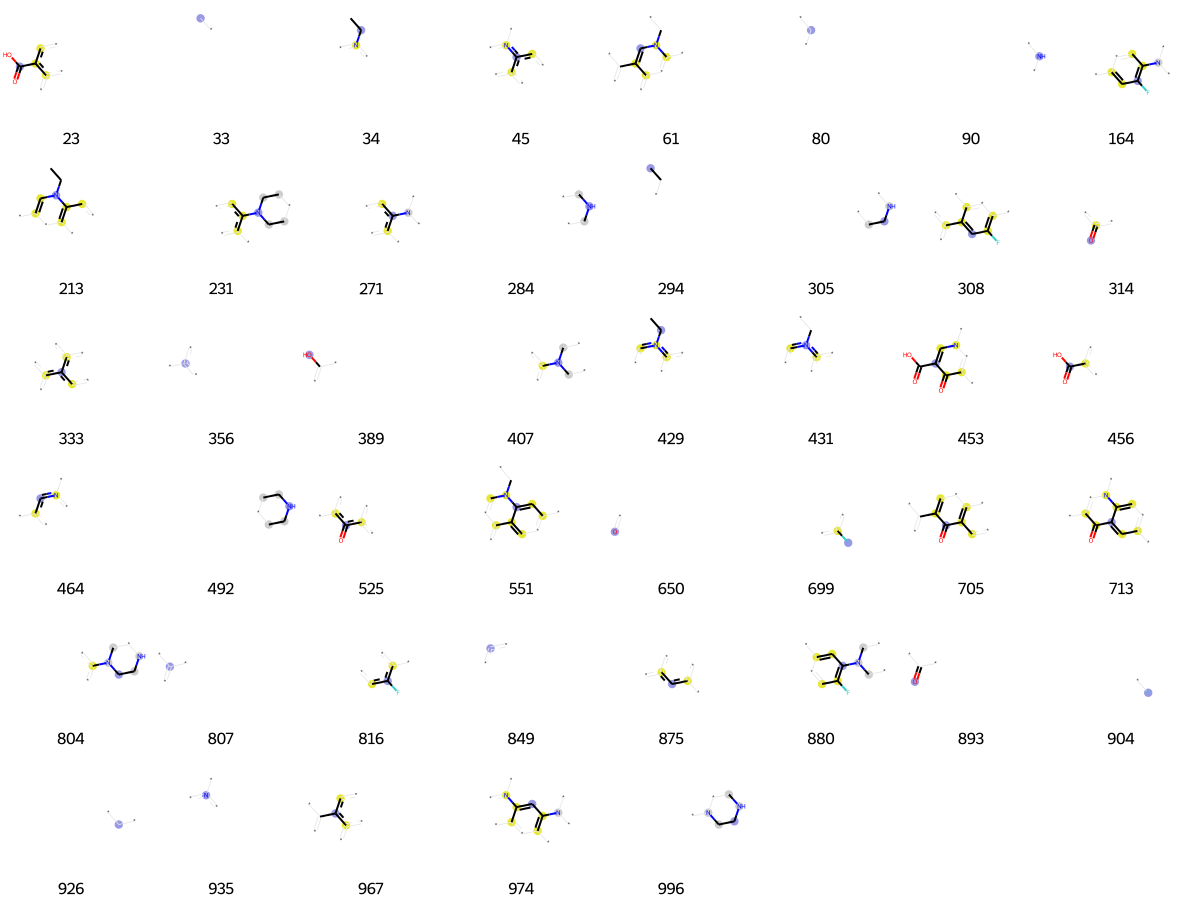

In [2557]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2558]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[21,
 33,
 45,
 58,
 80,
 92,
 128,
 197,
 219,
 233,
 235,
 294,
 307,
 310,
 318,
 319,
 331,
 350,
 355,
 356,
 378,
 425,
 441,
 452,
 454,
 483,
 496,
 502,
 528,
 532,
 582,
 650,
 667,
 698,
 700,
 707,
 715,
 726,
 730,
 742,
 757,
 775,
 799,
 801,
 807,
 828,
 831,
 849,
 875,
 883,
 893,
 896,
 919,
 935,
 965,
 969,
 974]

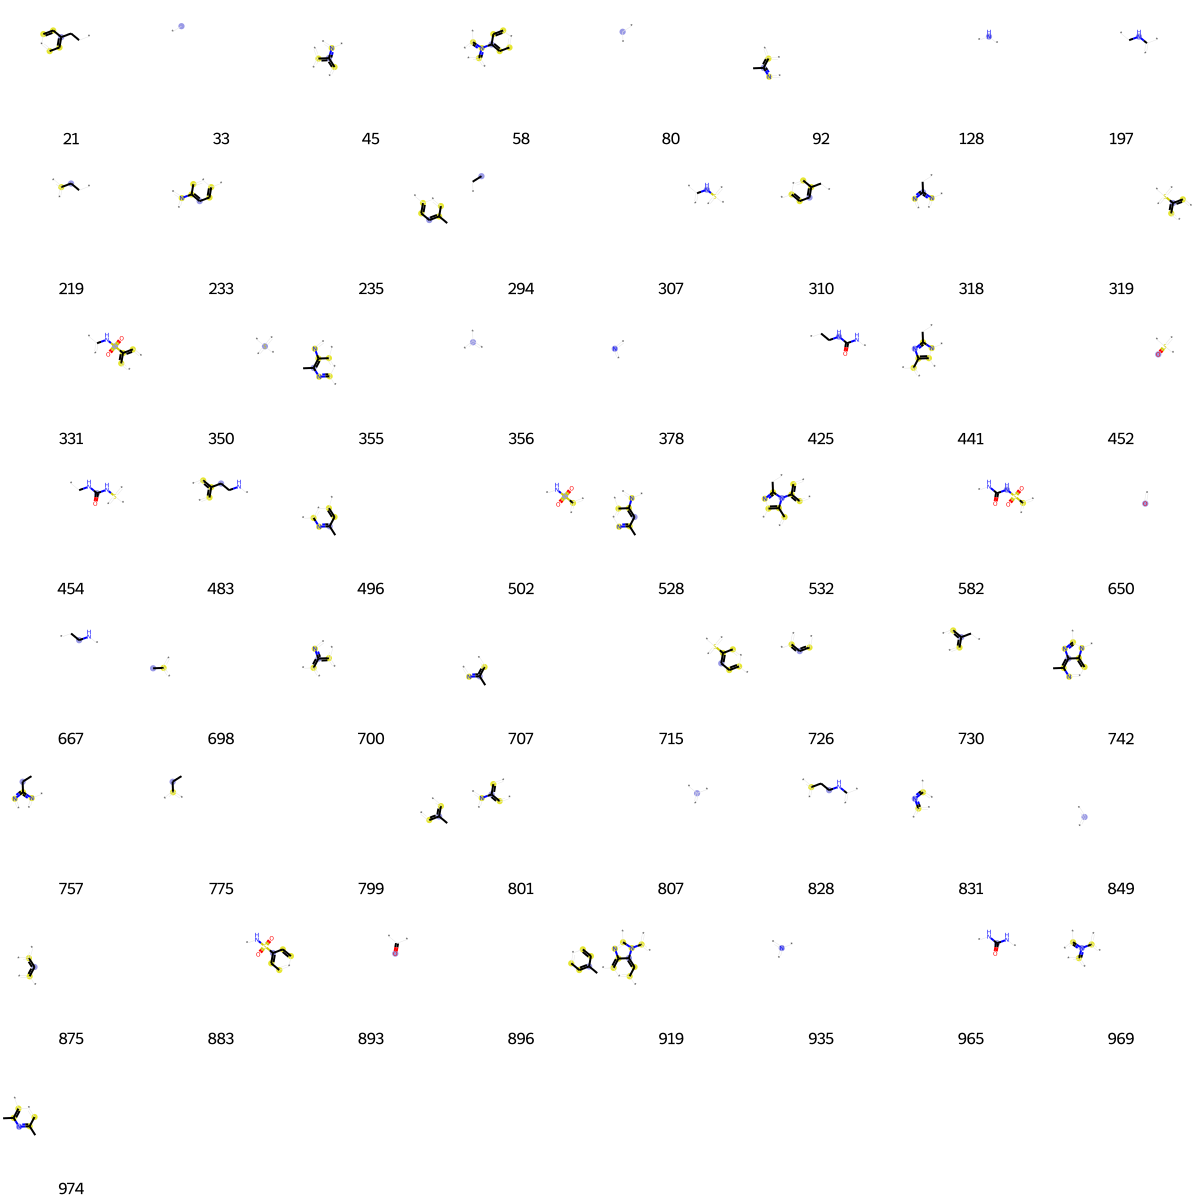

In [2559]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2560]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[26,
 31,
 33,
 34,
 73,
 80,
 119,
 128,
 133,
 138,
 139,
 157,
 160,
 191,
 200,
 202,
 216,
 301,
 305,
 329,
 332,
 333,
 343,
 356,
 366,
 378,
 419,
 422,
 428,
 441,
 464,
 465,
 489,
 491,
 523,
 524,
 557,
 561,
 650,
 652,
 656,
 659,
 673,
 694,
 695,
 699,
 708,
 716,
 726,
 780,
 786,
 792,
 794,
 807,
 816,
 840,
 843,
 849,
 875,
 881,
 888,
 893,
 894,
 899,
 904,
 911,
 926,
 946,
 950,
 961,
 972,
 1006,
 1015,
 1019]

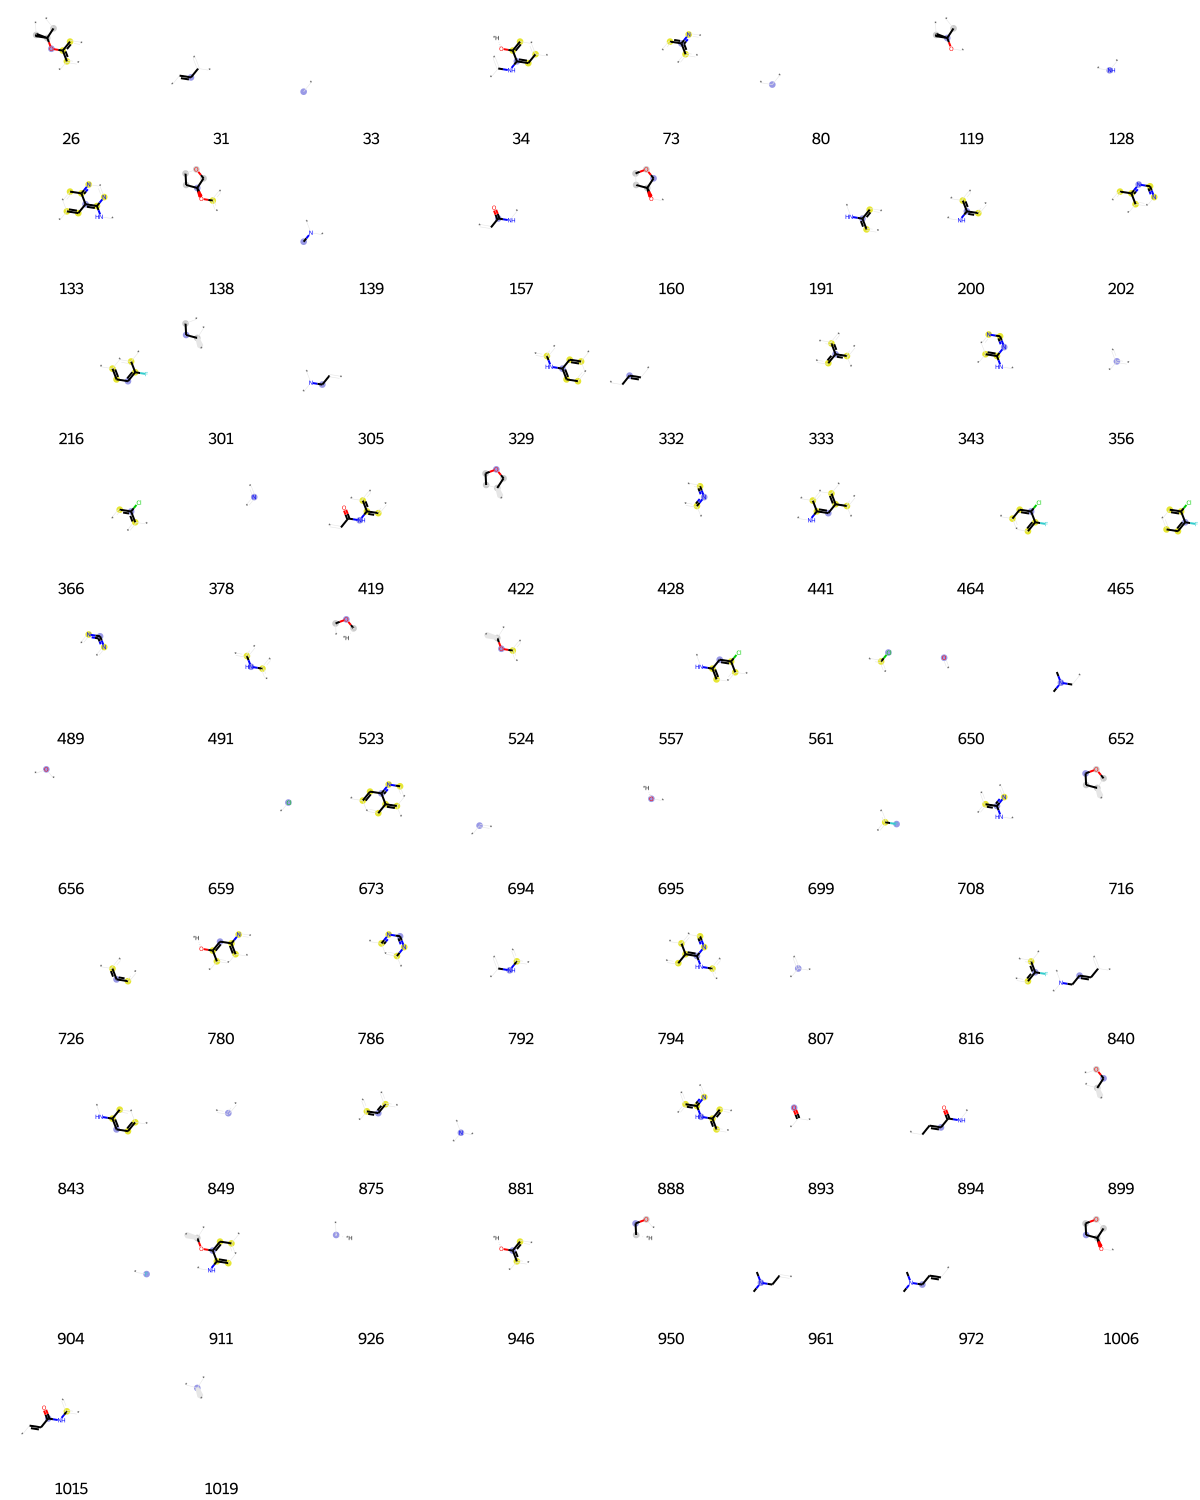

In [2561]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2562]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[30,
 33,
 71,
 80,
 90,
 118,
 128,
 134,
 136,
 162,
 209,
 222,
 276,
 302,
 319,
 350,
 356,
 366,
 392,
 452,
 473,
 485,
 502,
 536,
 561,
 602,
 639,
 650,
 659,
 666,
 667,
 672,
 675,
 691,
 692,
 698,
 721,
 723,
 725,
 726,
 732,
 775,
 807,
 842,
 849,
 875,
 893,
 896,
 921,
 999,
 1017]

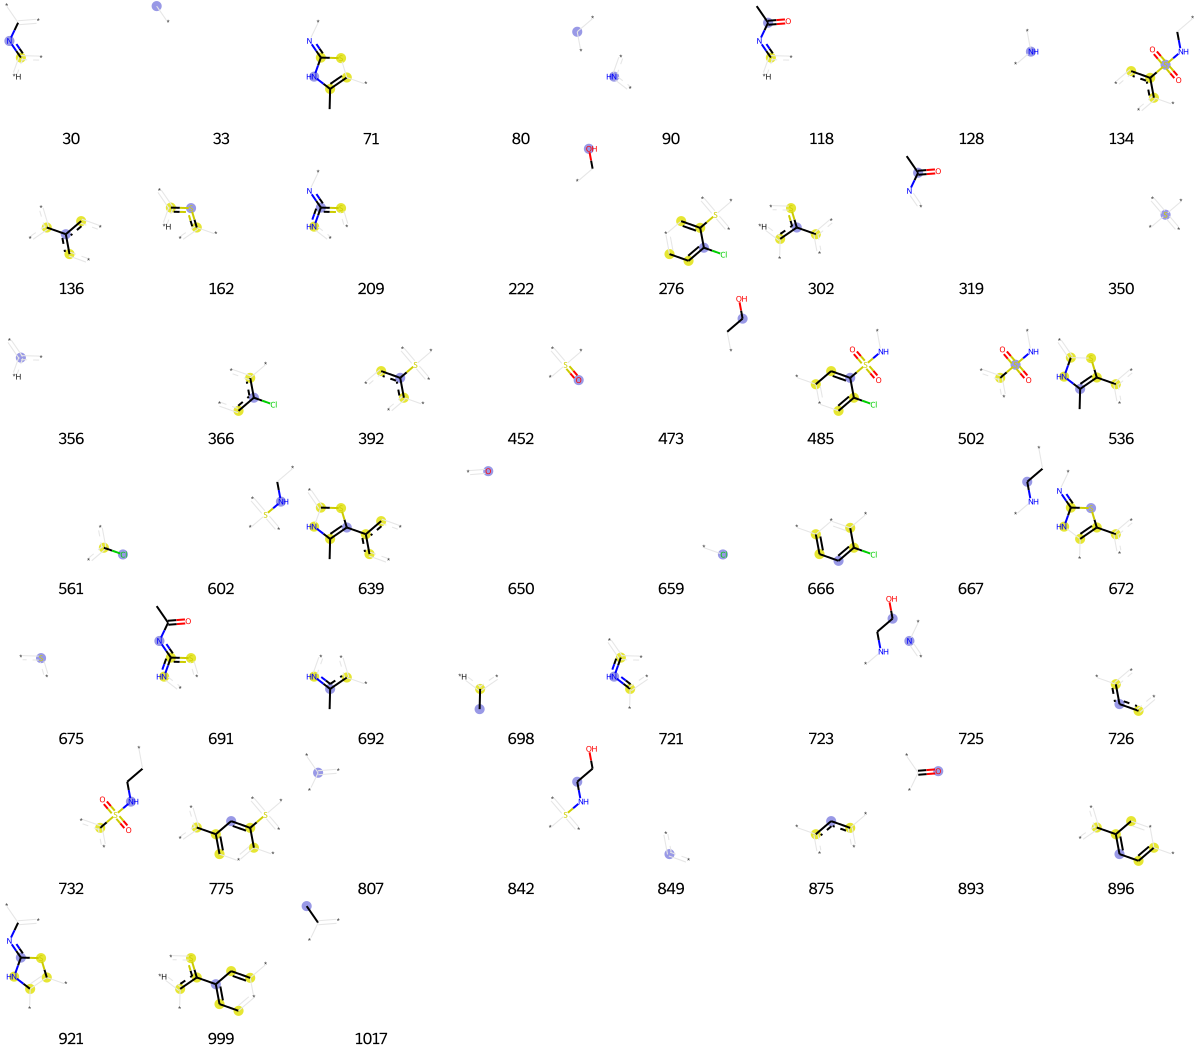

In [2563]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2564]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[15,
 33,
 64,
 102,
 116,
 175,
 179,
 189,
 330,
 356,
 378,
 389,
 394,
 430,
 512,
 570,
 674,
 698,
 707,
 710,
 726,
 798,
 831,
 849,
 892]

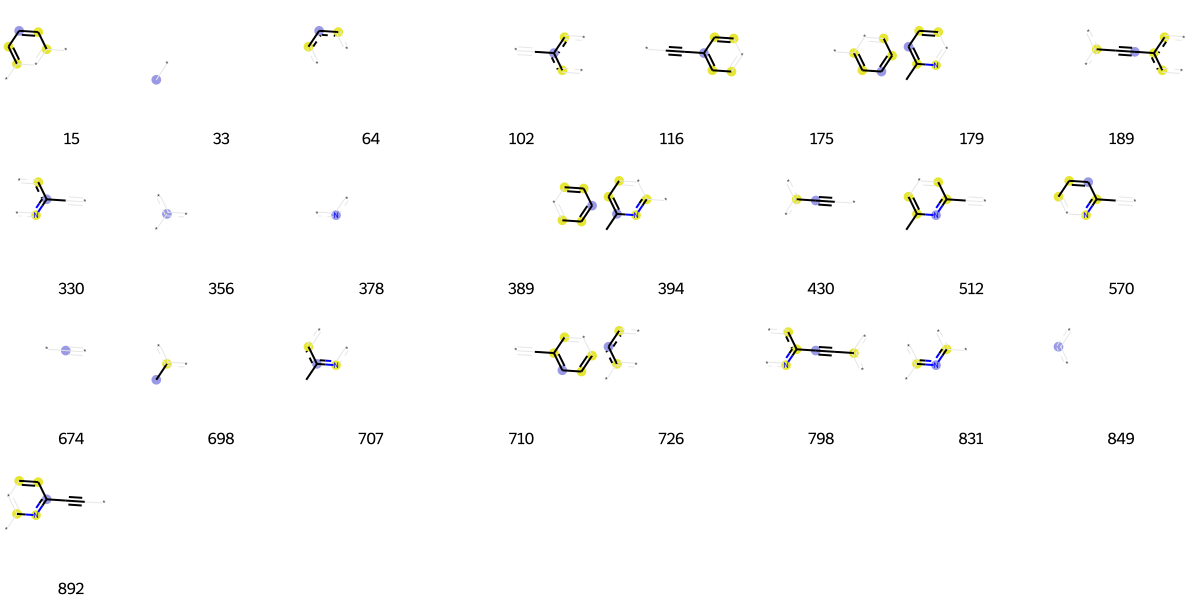

In [2565]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2566]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[17,
 92,
 110,
 125,
 140,
 147,
 240,
 285,
 301,
 314,
 338,
 350,
 356,
 386,
 401,
 409,
 452,
 531,
 592,
 600,
 635,
 650,
 684,
 695,
 739,
 807,
 886,
 892,
 893,
 905,
 923,
 926,
 935,
 1019]

In [2567]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2568]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[8,
 15,
 33,
 61,
 64,
 105,
 114,
 128,
 147,
 162,
 187,
 200,
 246,
 302,
 315,
 323,
 339,
 350,
 352,
 356,
 378,
 389,
 392,
 409,
 414,
 421,
 428,
 433,
 452,
 454,
 502,
 545,
 550,
 576,
 622,
 650,
 672,
 675,
 699,
 702,
 726,
 766,
 787,
 814,
 816,
 831,
 842,
 849,
 852,
 904,
 913,
 962,
 980,
 984,
 1008,
 1021]

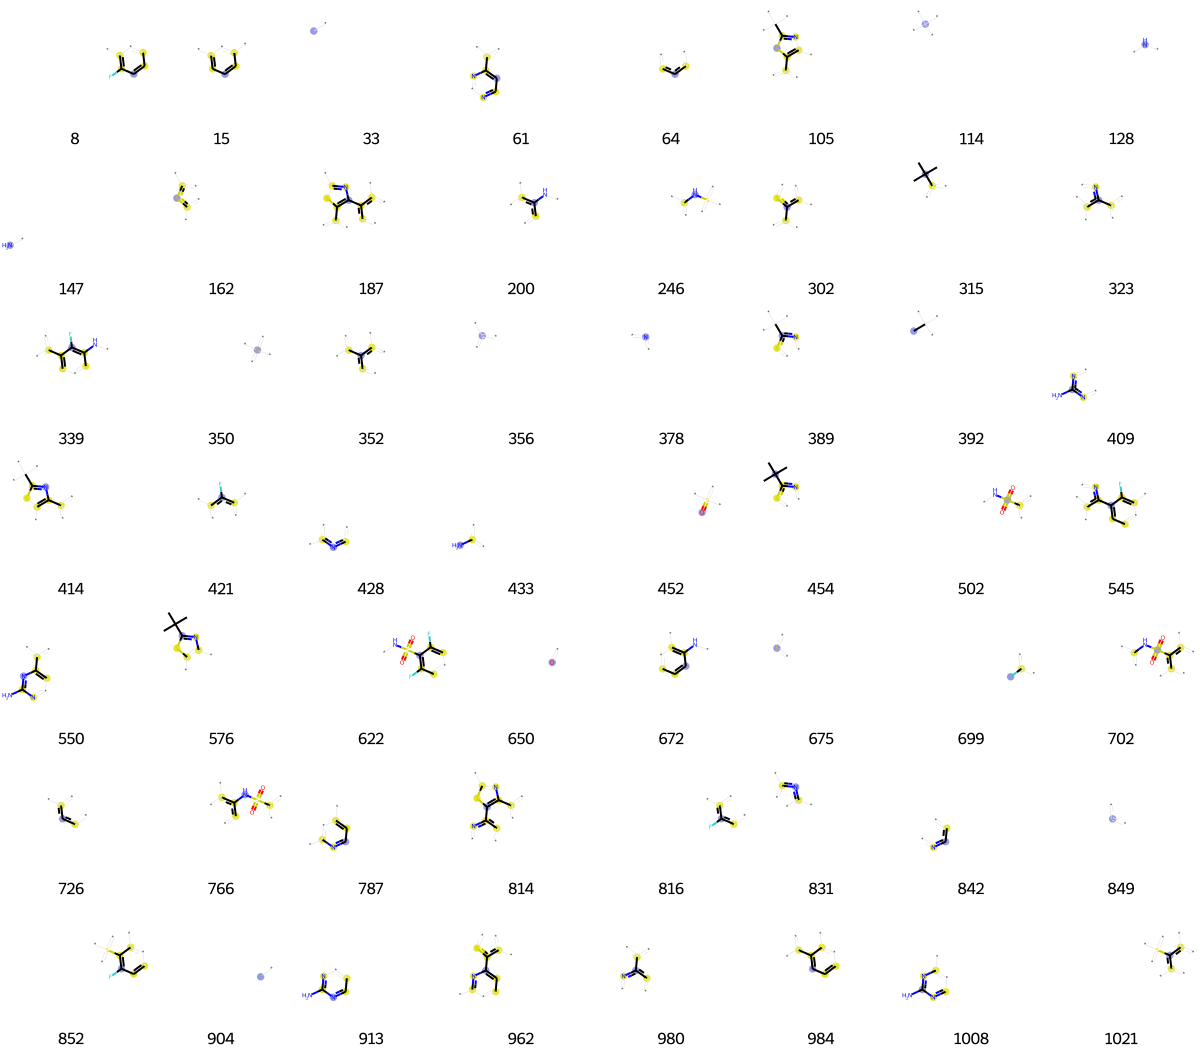

In [2569]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2570]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 4,
 13,
 33,
 69,
 99,
 114,
 125,
 128,
 149,
 283,
 284,
 315,
 322,
 356,
 360,
 378,
 389,
 392,
 393,
 398,
 408,
 412,
 414,
 428,
 447,
 532,
 558,
 611,
 641,
 664,
 694,
 695,
 703,
 713,
 718,
 725,
 726,
 787,
 813,
 831,
 841,
 842,
 849,
 851,
 885,
 932,
 935,
 968,
 972,
 989]

In [2571]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2572]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[14,
 15,
 33,
 41,
 64,
 65,
 73,
 80,
 84,
 117,
 121,
 128,
 184,
 191,
 200,
 207,
 212,
 233,
 249,
 294,
 322,
 346,
 356,
 366,
 378,
 386,
 401,
 407,
 428,
 456,
 458,
 484,
 491,
 496,
 511,
 512,
 544,
 555,
 558,
 561,
 562,
 593,
 650,
 659,
 687,
 695,
 703,
 721,
 726,
 772,
 792,
 801,
 807,
 821,
 831,
 832,
 841,
 849,
 875,
 893,
 898,
 899,
 901,
 926,
 935,
 946,
 950,
 1019]

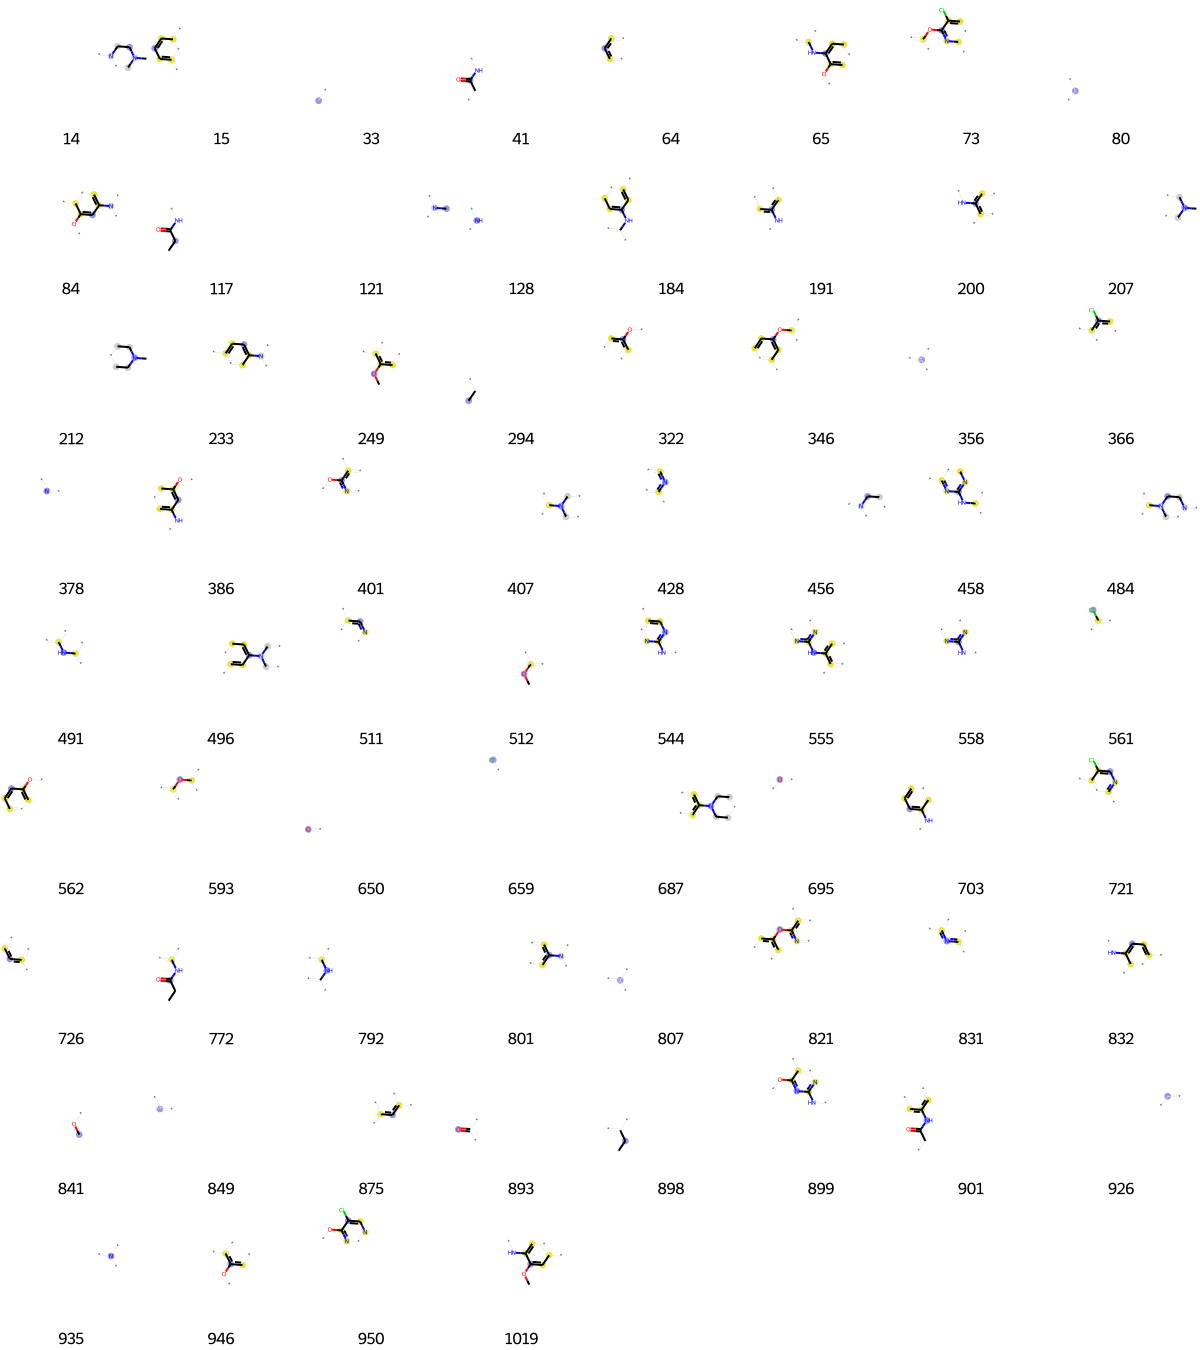

In [2573]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2574]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 3,
 33,
 73,
 80,
 94,
 104,
 114,
 139,
 140,
 179,
 212,
 214,
 219,
 221,
 231,
 249,
 283,
 284,
 310,
 313,
 342,
 356,
 360,
 393,
 506,
 512,
 524,
 588,
 641,
 644,
 674,
 677,
 695,
 726,
 730,
 778,
 790,
 812,
 841,
 849,
 858,
 875,
 881,
 887,
 927,
 946]

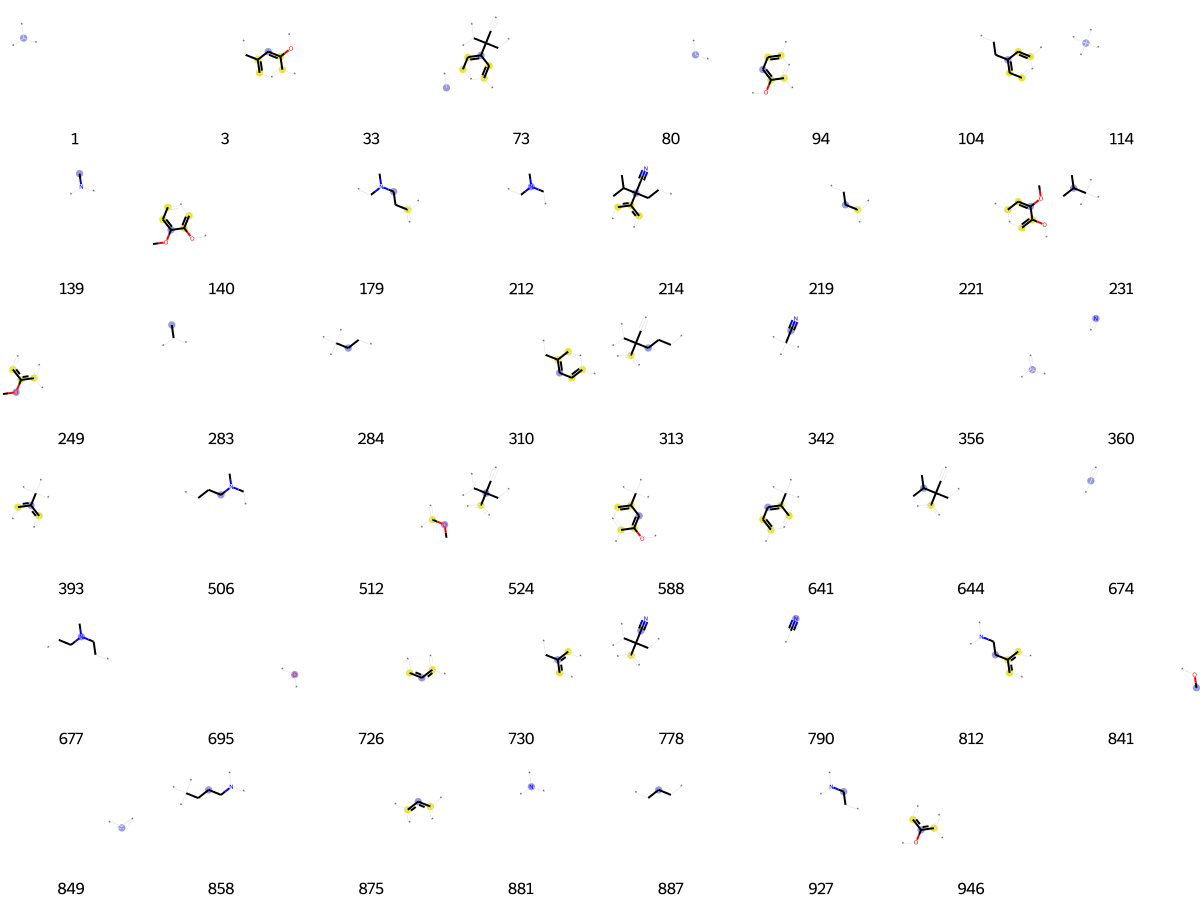

In [2575]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2576]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 19,
 42,
 64,
 80,
 96,
 140,
 158,
 186,
 245,
 257,
 352,
 356,
 366,
 372,
 378,
 437,
 454,
 511,
 561,
 562,
 566,
 579,
 599,
 608,
 624,
 645,
 659,
 664,
 698,
 726,
 730,
 741,
 759,
 842,
 849,
 935,
 974,
 984,
 1011]

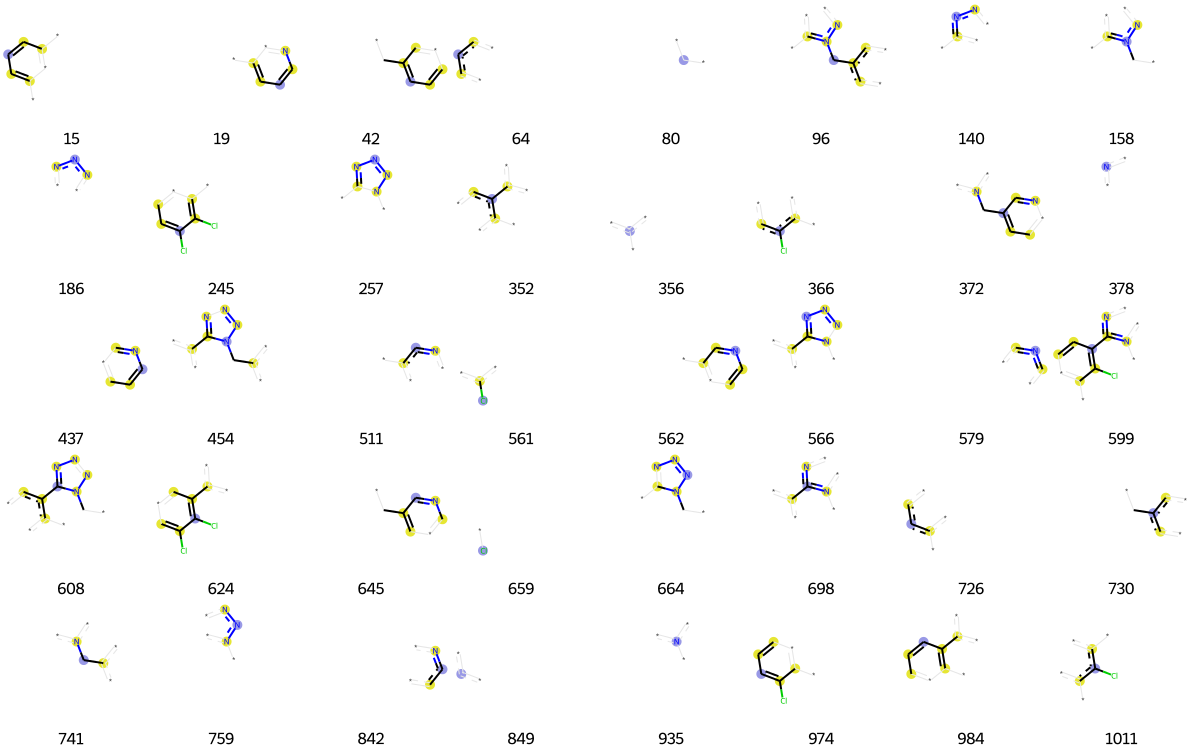

In [2577]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2578]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[9,
 10,
 15,
 33,
 64,
 80,
 128,
 136,
 147,
 182,
 185,
 204,
 214,
 230,
 242,
 259,
 268,
 285,
 294,
 301,
 314,
 356,
 373,
 378,
 387,
 411,
 428,
 448,
 455,
 463,
 496,
 511,
 522,
 539,
 585,
 610,
 622,
 628,
 633,
 646,
 650,
 656,
 694,
 695,
 698,
 699,
 722,
 726,
 734,
 736,
 750,
 785,
 799,
 807,
 818,
 825,
 835,
 849,
 854,
 875,
 879,
 889,
 893,
 896,
 899,
 904,
 926,
 941,
 963,
 977,
 1019]

In [2579]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[9,
 13,
 20,
 25,
 33,
 61,
 80,
 90,
 140,
 205,
 281,
 294,
 328,
 333,
 352,
 356,
 378,
 428,
 463,
 497,
 511,
 518,
 551,
 585,
 586,
 591,
 606,
 650,
 695,
 698,
 699,
 704,
 718,
 723,
 794,
 799,
 806,
 807,
 816,
 849,
 855,
 875,
 878,
 887,
 893,
 904,
 929,
 967,
 986]

In [2580]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[16,
 33,
 41,
 80,
 84,
 119,
 128,
 140,
 147,
 191,
 223,
 243,
 259,
 287,
 318,
 346,
 356,
 358,
 361,
 427,
 485,
 540,
 623,
 650,
 694,
 700,
 725,
 731,
 792,
 807,
 849,
 875,
 887,
 893,
 901,
 940,
 1017]

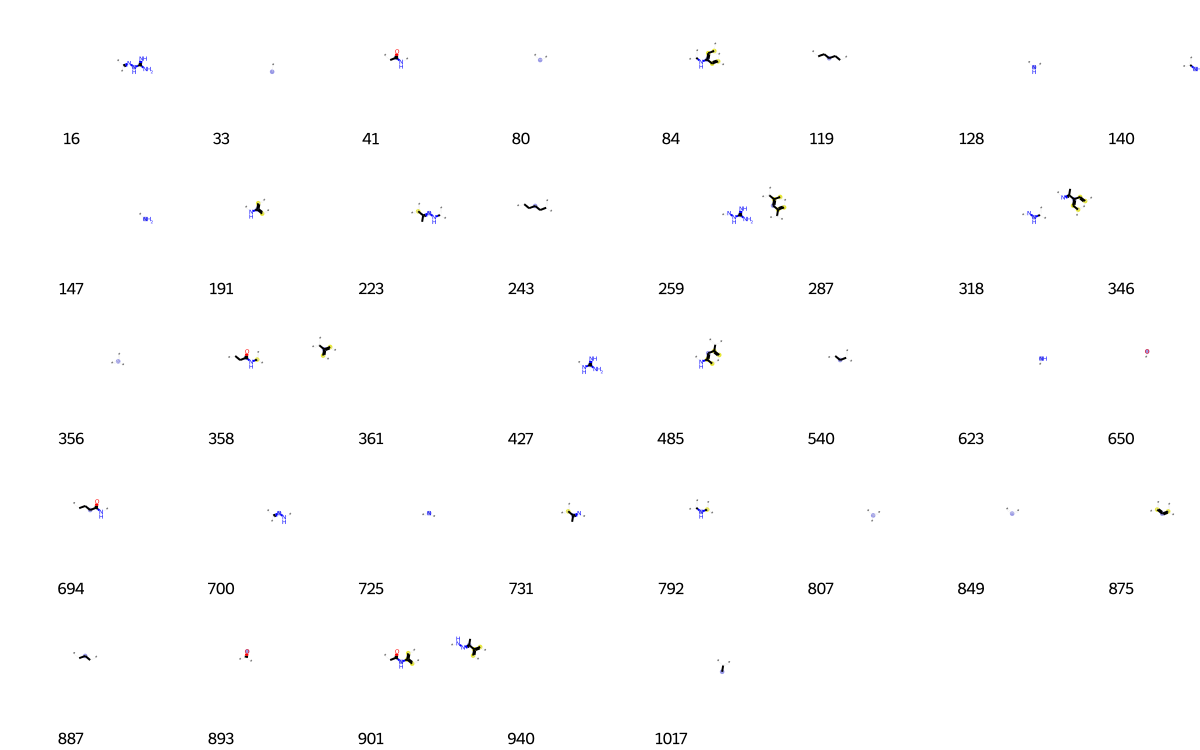

In [2581]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2582]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[3,
 33,
 80,
 94,
 104,
 140,
 144,
 147,
 219,
 221,
 249,
 310,
 356,
 512,
 695,
 726,
 730,
 816,
 841,
 849,
 875,
 937,
 946,
 981]

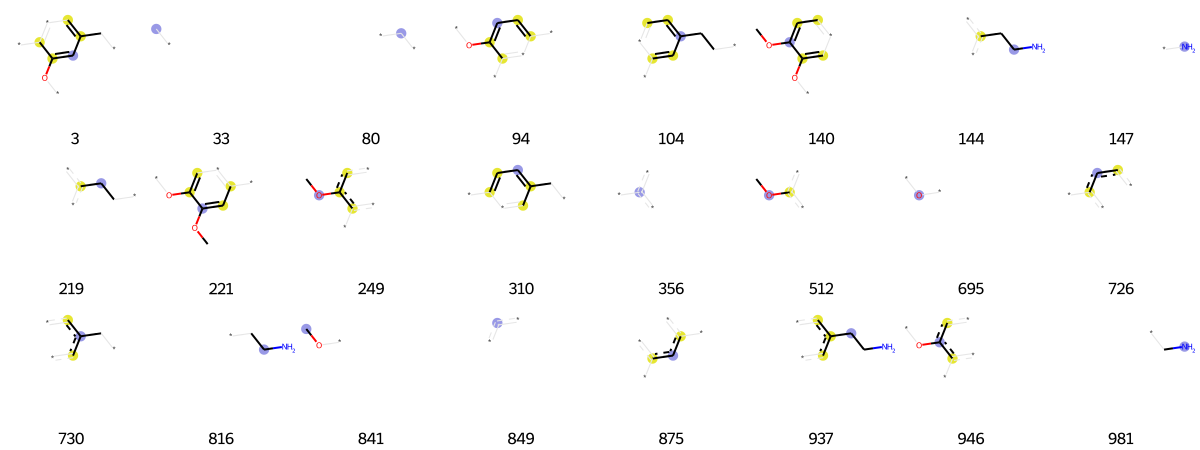

In [2583]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2584]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 4,
 8,
 13,
 33,
 36,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 138,
 140,
 144,
 157,
 221,
 232,
 241,
 249,
 251,
 283,
 301,
 333,
 335,
 338,
 356,
 378,
 391,
 398,
 407,
 428,
 456,
 458,
 494,
 512,
 565,
 610,
 624,
 644,
 653,
 688,
 695,
 708,
 738,
 747,
 767,
 780,
 796,
 827,
 831,
 841,
 848,
 849,
 875,
 887,
 891,
 904,
 926,
 935,
 946,
 974,
 1018,
 1019]

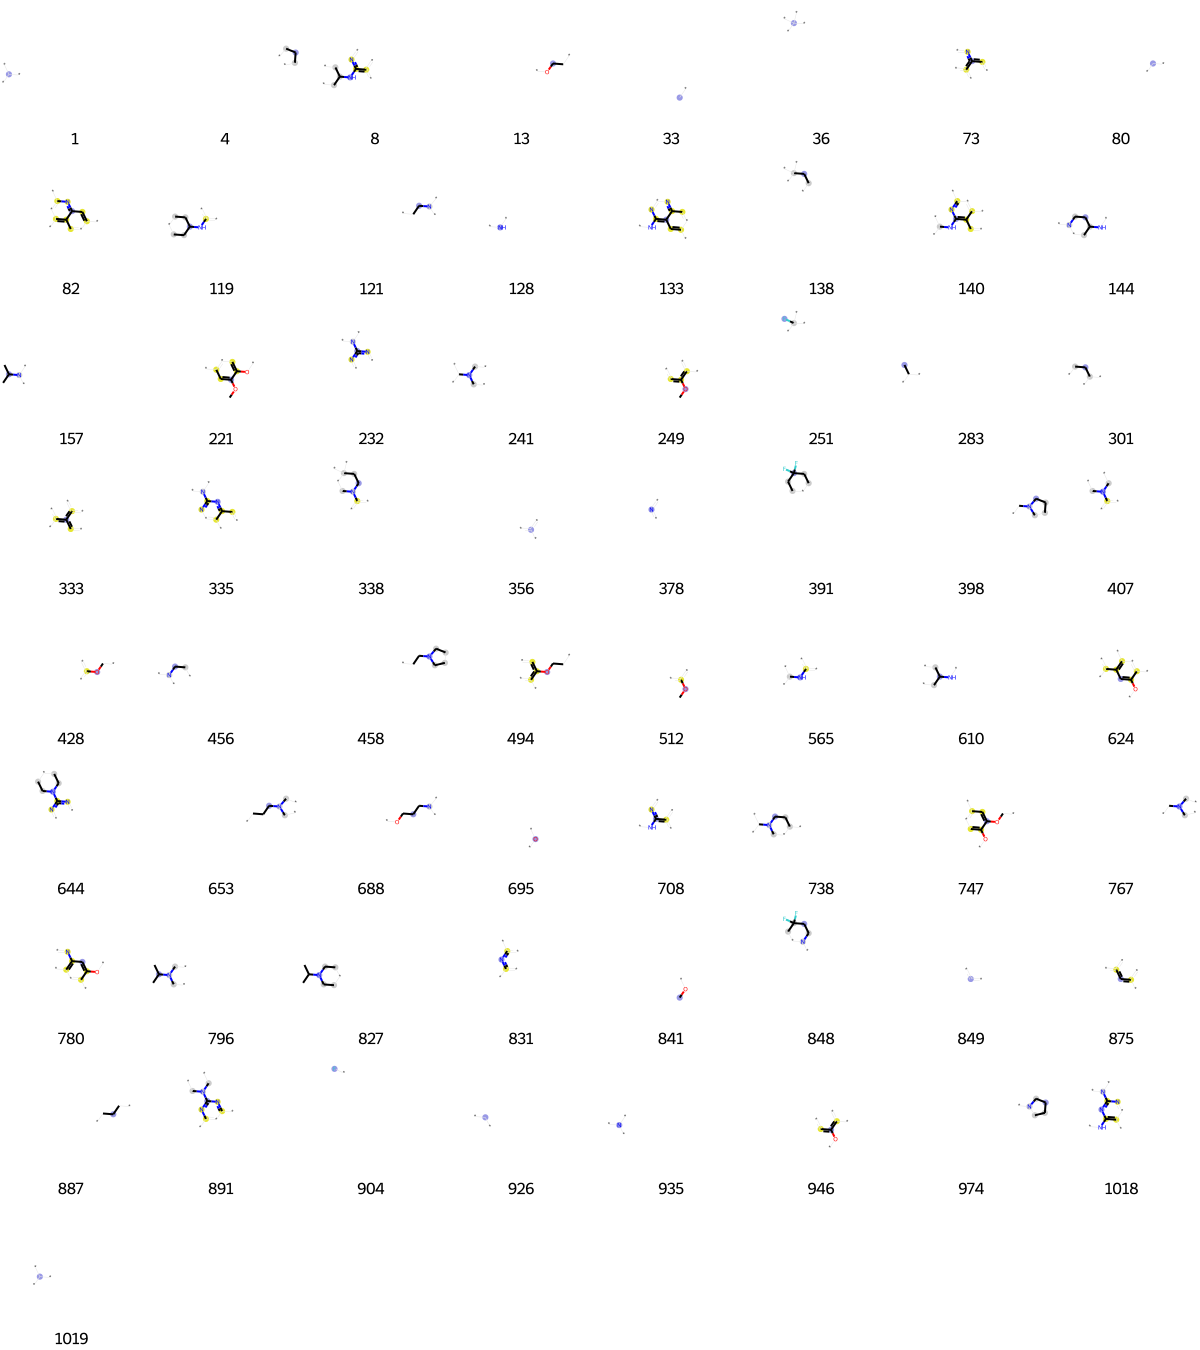

In [2585]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2586]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 9,
 32,
 33,
 69,
 71,
 80,
 125,
 147,
 149,
 186,
 192,
 201,
 209,
 245,
 283,
 313,
 316,
 351,
 356,
 378,
 397,
 428,
 431,
 433,
 435,
 445,
 452,
 486,
 489,
 492,
 521,
 538,
 548,
 585,
 626,
 650,
 672,
 692,
 695,
 700,
 728,
 786,
 807,
 849,
 884,
 893,
 898,
 932,
 935,
 954,
 962]

In [2587]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2588]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[15,
 33,
 42,
 54,
 63,
 64,
 72,
 80,
 128,
 139,
 145,
 175,
 200,
 228,
 288,
 294,
 333,
 344,
 356,
 363,
 414,
 514,
 540,
 549,
 623,
 649,
 672,
 726,
 730,
 739,
 775,
 792,
 801,
 807,
 831,
 849,
 875,
 881,
 913]

In [2589]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2590]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 3,
 33,
 64,
 80,
 112,
 117,
 128,
 147,
 150,
 175,
 273,
 283,
 301,
 352,
 356,
 365,
 366,
 371,
 389,
 458,
 600,
 650,
 680,
 695,
 726,
 734,
 736,
 759,
 807,
 820,
 823,
 849,
 893,
 905,
 953,
 977,
 984,
 1019]

In [2591]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])